# Comparing Debt 

In [59]:
!pip install nltk
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [60]:
# Al Jazeera

import pandas
import re
import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


#I am creating an empty dictionary here
inputdata = {}
#header is my first row in the csv file that is why hesder is 0 below
inputdata = pandas.read_csv('Al-jazeera debt.csv', header=[0], index_col=0).to_dict()

#we can use type to check the data type of input data variable
#print(type(inputdata))

#I created a new dictionaru below for the Text column in the csv file
textdictionary = inputdata.get("text")

#I am converting dictionary to a list so I can analyze the data
textlist = list(textdictionary.values())

#convert text to lower case
textlist_lowercase = [str(i).lower() for i in textlist]

#remove special characters
textlist_lowercase = [re.sub(r"[^a-zA-Z]", " ", text) for text in textlist_lowercase]

CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in textlist_lowercase :
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

reviewswithoutlinks=[]
#Remove links
for text in cleanedreviews:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        reviewswithoutlinks.append(remove_com)

#Remove special characters
reviewswithoutlinks = [unidecode.unidecode(text) for text in reviewswithoutlinks]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in reviewswithoutlinks]
#This is how we can remove individual words that does not make sense from the wordcloud
cleantext = [re.sub("Came"," ",text) for text in reviewswithoutlinks]
cleantext = [re.sub("came"," ",text) for text in reviewswithoutlinks]

#Test it make sure the text is indeed clean!
#print(cleantext)

#Convert list to string. Most text analysis libraries require input to be a string
textinstring = ""
for eachletter in cleantext:
    textinstring += ''+ str(eachletter)

text_tokens = word_tokenize(textinstring)

text_tokens_without_stopwords = [word for word in text_tokens if not word in stopwords.words()]

#print(text_tokens_without_stopwords)

unigrams = ngrams(text_tokens_without_stopwords , 1)
bigrams = ngrams(text_tokens_without_stopwords ,2)
trigrams = ngrams(text_tokens_without_stopwords ,3)

mostcommonunigrams = Counter(unigrams)
#This will print top 3 unigrams
print(mostcommonunigrams.most_common(8))

mostcommonbigrams = Counter(bigrams)
print(mostcommonbigrams.most_common(8))

mostcommontrigrams = Counter(trigrams)
print(mostcommontrigrams.most_common(8))

print("done")


[(('debt',), 17), (('trillion',), 8), (('time',), 7), (('trump',), 7), (('harris',), 6), (('government',), 6), (('nlist',), 5), (('nthe',), 5)]
[(('national', 'debt'), 3), (('united', 'states'), 2), (('trillion', 'percent'), 2), (('percent', 'gdp'), 2), (('trillion', 'decade'), 2), (('trump', 'harris'), 2), (('penn', 'wharton'), 2), (('wharton', 'budget'), 2)]
[(('penn', 'wharton', 'budget'), 2), (('wharton', 'budget', 'model'), 2), (('time', 'united', 'states'), 1), (('united', 'states', 'ballooning'), 1), (('states', 'ballooning', 'national'), 1), (('ballooning', 'national', 'debt'), 1), (('national', 'debt', 'major'), 1), (('debt', 'major', 'talking'), 1)]
done


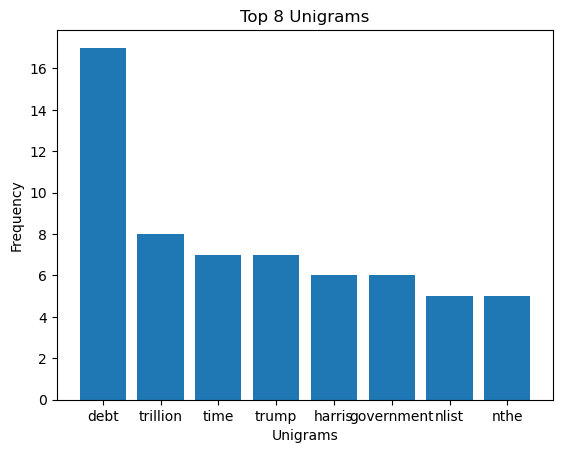

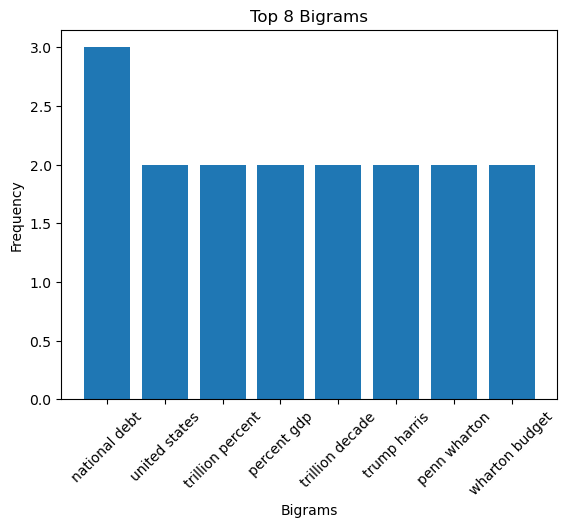

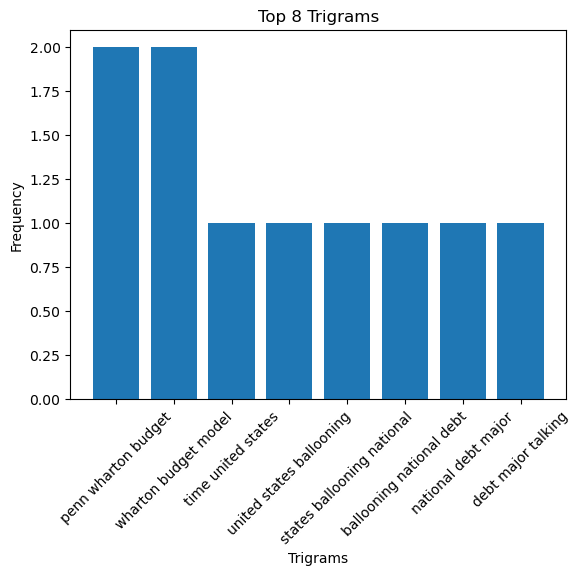

In [61]:
#Draw a histogram of top 8 unigrams
top8unigrams = mostcommonunigrams.most_common(8)
top8unigrams_keys = []
top8unigrams_values = []
import re
for i in range(len(top3unigrams)):
    #print(top3unigrams[i][0][0])
    top8unigrams_keys.append(top8unigrams[i][0][0])
    top8unigrams_values.append(top8unigrams[i][1])

#print(top3unigrams_keys)
#print(top3unigrams_values)

import matplotlib.pyplot as plt

plt.bar(top3unigrams_keys, top3unigrams_values)
plt.title("Top 8 Unigrams")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.show()

#########################################
# Draw a histogram of top 8 bigrams
top8bigrams = mostcommonbigrams.most_common(8)
top8bigrams_keys = []
top8bigrams_values = []

for i in range(len(top8bigrams)):
    top8bigrams_keys.append(" ".join(top8bigrams[i][0]))  # Join the bigram tuple into a string
    top8bigrams_values.append(top8bigrams[i][1])

plt.bar(top8bigrams_keys, top8bigrams_values)
plt.title("Top 8 Bigrams")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()
################

# Draw a histogram of top 8 trigrams
top8trigrams = mostcommontrigrams.most_common(8)
top8trigrams_keys = []
top8trigrams_values = []

for i in range(len(top8trigrams)):
    top8trigrams_keys.append(" ".join(top8trigrams[i][0]))  # Join the trigram tuple into a string
    top8trigrams_values.append(top8trigrams[i][1])

import matplotlib.pyplot as plt

plt.bar(top8trigrams_keys, top8trigrams_values)
plt.title("Top 8 Trigrams")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()




In [62]:
# Al Jazeera

import pandas
import re
import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


#I am creating an empty dictionary here
inputdata = {}
#header is my first row in the csv file that is why hesder is 0 below
inputdata = pandas.read_csv('Al-jazeera debt.csv', encoding='latin-1',header=[0], index_col=0).to_dict()

#we can use type to check the data type of input data variable
#print(type(inputdata))

#I created a new dictionaru below for the Text column in the csv file
textdictionary = inputdata.get("text")

#I am converting dictionary to a list so I can analyze the data
textlist = list(textdictionary.values())

#convert text to lower case
textlist_lowercase = [str(i).lower() for i in textlist]

#remove special characters
textlist_lowercase = [re.sub(r"[^a-zA-Z]", " ", text) for text in textlist_lowercase]

CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in textlist_lowercase :
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

reviewswithoutlinks=[]
#Remove links
for text in cleanedreviews:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        reviewswithoutlinks.append(remove_com)

#Remove special characters
reviewswithoutlinks = [unidecode.unidecode(text) for text in reviewswithoutlinks]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in reviewswithoutlinks]
#This is how we can remove individual words that does not make sense from the wordcloud
cleantext = [re.sub("Came"," ",text) for text in reviewswithoutlinks]
cleantext = [re.sub("came"," ",text) for text in reviewswithoutlinks]

#Test it make sure the text is indeed clean!
#print(cleantext)

#Convert list to string. Most text analysis libraries require input to be a string
textinstring = ""
for eachletter in cleantext:
    textinstring += ''+ str(eachletter)

text_tokens = word_tokenize(textinstring)

text_tokens_without_stopwords = [word for word in text_tokens if not word in stopwords.words()]

#print(text_tokens_without_stopwords)

unigrams = ngrams(text_tokens_without_stopwords , 1)
bigrams = ngrams(text_tokens_without_stopwords ,2)
trigrams = ngrams(text_tokens_without_stopwords ,3)

mostcommonunigrams = Counter(unigrams)
#This will print top 3 unigrams
print(mostcommonunigrams.most_common(8))

mostcommonbigrams = Counter(bigrams)
print(mostcommonbigrams.most_common(8))

mostcommontrigrams = Counter(trigrams)
print(mostcommontrigrams.most_common(8))

print("done")


[(('debt',), 17), (('trillion',), 8), (('time',), 7), (('trump',), 7), (('harris',), 6), (('government',), 6), (('nlist',), 5), (('nthe',), 5)]
[(('national', 'debt'), 3), (('united', 'states'), 2), (('trillion', 'percent'), 2), (('percent', 'gdp'), 2), (('trillion', 'decade'), 2), (('trump', 'harris'), 2), (('penn', 'wharton'), 2), (('wharton', 'budget'), 2)]
[(('penn', 'wharton', 'budget'), 2), (('wharton', 'budget', 'model'), 2), (('time', 'united', 'states'), 1), (('united', 'states', 'ballooning'), 1), (('states', 'ballooning', 'national'), 1), (('ballooning', 'national', 'debt'), 1), (('national', 'debt', 'major'), 1), (('debt', 'major', 'talking'), 1)]
done


In [63]:
# Daily Signal

import pandas
import re
import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


#I am creating an empty dictionary here
inputdata = {}
#header is my first row in the csv file that is why hesder is 0 below   ## ADDING ENCODING TO BYPASS ERROR
inputdata = pandas.read_csv('Daily Signal_debt.csv', encoding='latin-1',header=[0], index_col=0).to_dict()

#we can use type to check the data type of input data variable
#print(type(inputdata))

#I created a new dictionaru below for the Text column in the csv file
textdictionary = inputdata.get("text")

#I am converting dictionary to a list so I can analyze the data
textlist = list(textdictionary.values())

#convert text to lower case
textlist_lowercase = [str(i).lower() for i in textlist]

#remove special characters
textlist_lowercase = [re.sub(r"[^a-zA-Z]", " ", text) for text in textlist_lowercase]

CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in textlist_lowercase :
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

reviewswithoutlinks=[]
#Remove links
for text in cleanedreviews:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        reviewswithoutlinks.append(remove_com)

#Remove special characters
reviewswithoutlinks = [unidecode.unidecode(text) for text in reviewswithoutlinks]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in reviewswithoutlinks]
#This is how we can remove individual words that does not make sense from the wordcloud
cleantext = [re.sub("Came"," ",text) for text in reviewswithoutlinks]
cleantext = [re.sub("came"," ",text) for text in reviewswithoutlinks]

#Test it make sure the text is indeed clean!
#print(cleantext)

#Convert list to string. Most text analysis libraries require input to be a string
textinstring = ""
for eachletter in cleantext:
    textinstring += ''+ str(eachletter)

text_tokens = word_tokenize(textinstring)

text_tokens_without_stopwords = [word for word in text_tokens if not word in stopwords.words()]

#print(text_tokens_without_stopwords)

unigrams = ngrams(text_tokens_without_stopwords , 1)
bigrams = ngrams(text_tokens_without_stopwords ,2)
trigrams = ngrams(text_tokens_without_stopwords ,3)

mostcommonunigrams = Counter(unigrams)
#This will print top 3 unigrams
print(mostcommonunigrams.most_common(8))

mostcommonbigrams = Counter(bigrams)
print(mostcommonbigrams.most_common(8))

mostcommontrigrams = Counter(trigrams)
print(mostcommontrigrams.most_common(8))

print("done")

[(('biden',), 9), (('harris',), 8), (('debt',), 8), (('interest',), 7), (('administration',), 6), (('federal',), 6), (('trillion',), 5), (('government',), 5)]
[(('biden', 'harris'), 8), (('harris', 'administration'), 5), (('national', 'debt'), 3), (('interest', 'rates'), 3), (('office', 'jan'), 2), (('federal', 'reserve'), 2), (('interest', 'payments'), 2), (('fiscal', 'year'), 2)]
[(('biden', 'harris', 'administration'), 5), (('president', 'joe', 'biden'), 1), (('joe', 'biden', 'leave'), 1), (('biden', 'leave', 'office'), 1), (('leave', 'office', 'jan'), 1), (('office', 'jan', 'biden'), 1), (('jan', 'biden', 'harris'), 1), (('harris', 'administration', 'riddled'), 1)]
done


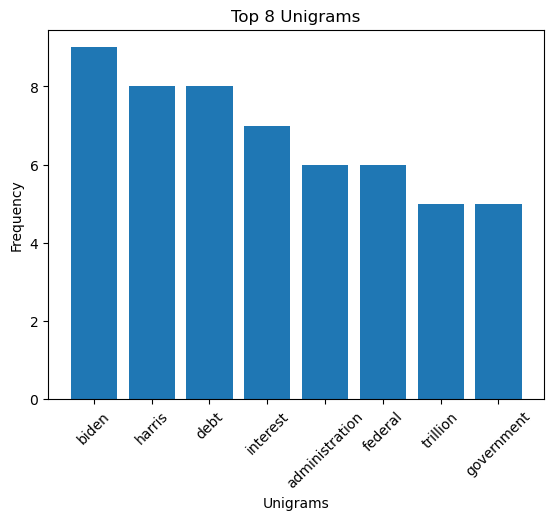

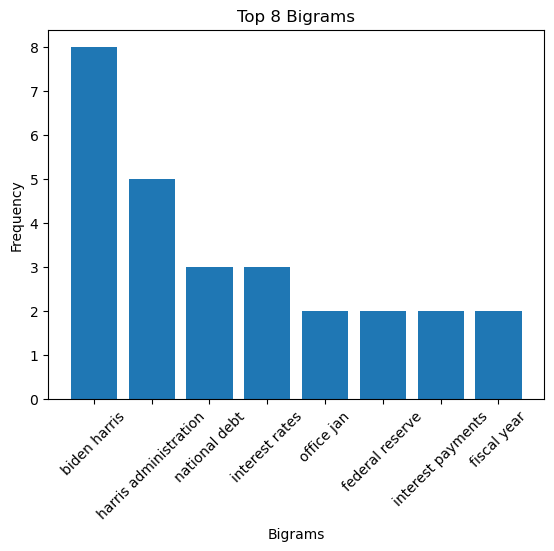

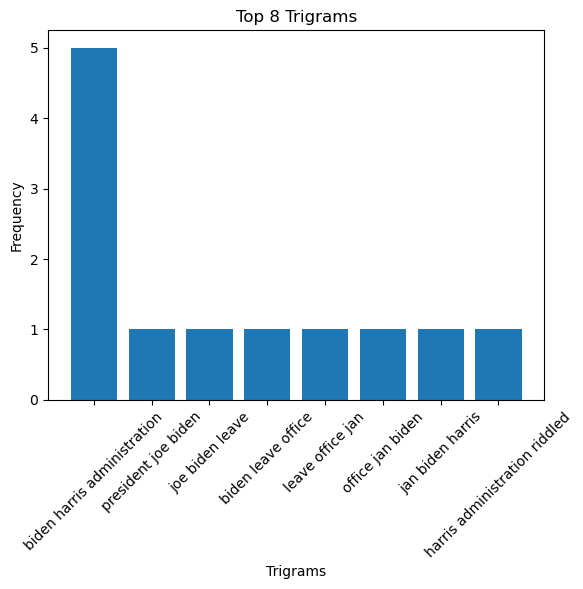

In [64]:
#Draw a histogram of top 8 unigrams
top8unigrams = mostcommonunigrams.most_common(8)
top8unigrams_keys = []
top8unigrams_values = []
import re
for i in range(len(top8unigrams)):
    #print(top3unigrams[i][0][0])
    top8unigrams_keys.append(top8unigrams[i][0][0])
    top8unigrams_values.append(top8unigrams[i][1])

#print(top3unigrams_keys)
#print(top3unigrams_values)

import matplotlib.pyplot as plt

plt.bar(top8unigrams_keys, top8unigrams_values)
plt.title("Top 8 Unigrams")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

#########################################
# Draw a histogram of top 8 bigrams
top8bigrams = mostcommonbigrams.most_common(8)
top8bigrams_keys = []
top8bigrams_values = []

for i in range(len(top8bigrams)):
    top8bigrams_keys.append(" ".join(top8bigrams[i][0]))  # Join the bigram tuple into a string
    top8bigrams_values.append(top8bigrams[i][1])

plt.bar(top8bigrams_keys, top8bigrams_values)
plt.title("Top 8 Bigrams")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

################

# Draw a histogram of top 8 trigrams
top8trigrams = mostcommontrigrams.most_common(8)
top8trigrams_keys = []
top8trigrams_values = []

for i in range(len(top8trigrams)):
    top8trigrams_keys.append(" ".join(top8trigrams[i][0]))  # Join the trigram tuple into a string
    top8trigrams_values.append(top8trigrams[i][1])

import matplotlib.pyplot as plt

plt.bar(top8trigrams_keys, top8trigrams_values)
plt.title("Top 8 Trigrams")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()



# Comparing Border 

In [65]:
# Fox 

import pandas
import re
import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


#I am creating an empty dictionary here
inputdata = {}
#header is my first row in the csv file that is why hesder is 0 below   ## ADDING ENCODING TO BYPASS ERROR
inputdata = pandas.read_csv('Fox border.csv', encoding='latin-1',header=[0], index_col=0).to_dict()

#we can use type to check the data type of input data variable
#print(type(inputdata))

#I created a new dictionaru below for the Text column in the csv file
textdictionary = inputdata.get("text")

#I am converting dictionary to a list so I can analyze the data
textlist = list(textdictionary.values())

#convert text to lower case
textlist_lowercase = [str(i).lower() for i in textlist]

#remove special characters
textlist_lowercase = [re.sub(r"[^a-zA-Z]", " ", text) for text in textlist_lowercase]

CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in textlist_lowercase :
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

reviewswithoutlinks=[]
#Remove links
for text in cleanedreviews:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        reviewswithoutlinks.append(remove_com)

#Remove special characters
reviewswithoutlinks = [unidecode.unidecode(text) for text in reviewswithoutlinks]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in reviewswithoutlinks]
#This is how we can remove individual words that does not make sense from the wordcloud
cleantext = [re.sub("Came"," ",text) for text in reviewswithoutlinks]
cleantext = [re.sub("came"," ",text) for text in reviewswithoutlinks]

#Test it make sure the text is indeed clean!
#print(cleantext)

#Convert list to string. Most text analysis libraries require input to be a string
textinstring = ""
for eachletter in cleantext:
    textinstring += ''+ str(eachletter)

text_tokens = word_tokenize(textinstring)

text_tokens_without_stopwords = [word for word in text_tokens if not word in stopwords.words()]

#print(text_tokens_without_stopwords)

unigrams = ngrams(text_tokens_without_stopwords , 1)
bigrams = ngrams(text_tokens_without_stopwords ,2)
trigrams = ngrams(text_tokens_without_stopwords ,3)

mostcommonunigrams = Counter(unigrams)
#This will print top 3 unigrams
print(mostcommonunigrams.most_common(8))

mostcommonbigrams = Counter(bigrams)
print(mostcommonbigrams.most_common(8))

mostcommontrigrams = Counter(trigrams)
print(mostcommontrigrams.most_common(8))

print("done")


[(('border',), 3), (('harris',), 2), (('compromise',), 2), (('vice',), 1), (('president',), 1), (('kamala',), 1), (('stumbled',), 1), (('biden',), 1)]
[(('vice', 'president'), 1), (('president', 'kamala'), 1), (('kamala', 'harris'), 1), (('harris', 'stumbled'), 1), (('stumbled', 'biden'), 1), (('biden', 'harris'), 1), (('harris', 'administration'), 1), (('administration', 'border'), 1)]
[(('vice', 'president', 'kamala'), 1), (('president', 'kamala', 'harris'), 1), (('kamala', 'harris', 'stumbled'), 1), (('harris', 'stumbled', 'biden'), 1), (('stumbled', 'biden', 'harris'), 1), (('biden', 'harris', 'administration'), 1), (('harris', 'administration', 'border'), 1), (('administration', 'border', 'immigration'), 1)]
done


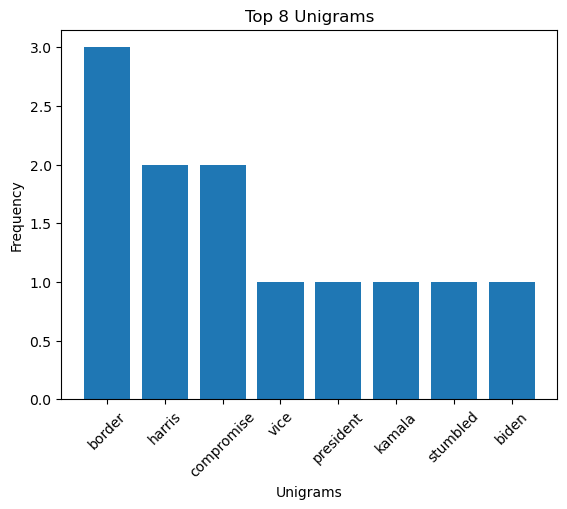

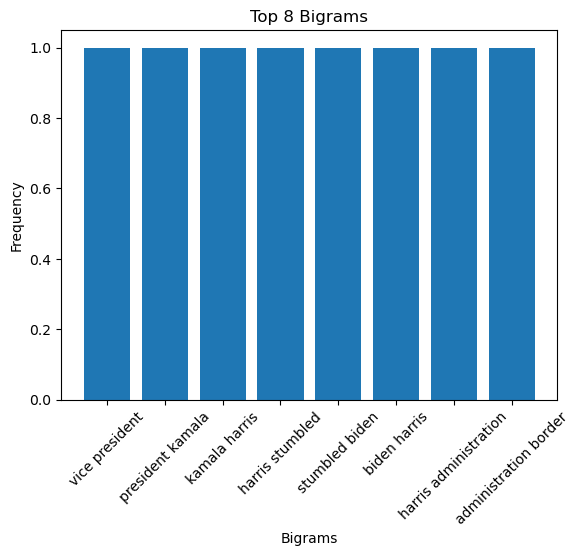

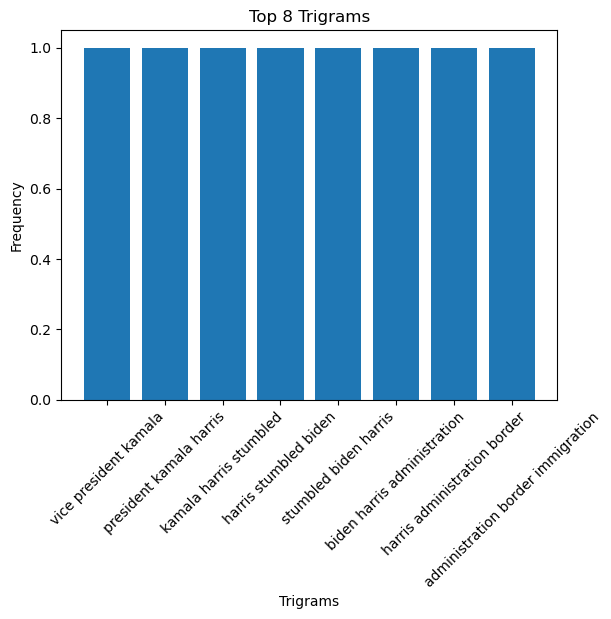

In [66]:
#Draw a histogram of top 8 unigrams
top8unigrams = mostcommonunigrams.most_common(8)
top8unigrams_keys = []
top8unigrams_values = []
import re
for i in range(len(top8unigrams)):
    #print(top3unigrams[i][0][0])
    top8unigrams_keys.append(top8unigrams[i][0][0])
    top8unigrams_values.append(top8unigrams[i][1])

#print(top3unigrams_keys)
#print(top3unigrams_values)

import matplotlib.pyplot as plt

plt.bar(top8unigrams_keys, top8unigrams_values)
plt.title("Top 8 Unigrams")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

#########################################
# Draw a histogram of top 8 bigrams
top8bigrams = mostcommonbigrams.most_common(8)
top8bigrams_keys = []
top8bigrams_values = []

for i in range(len(top8bigrams)):
    top8bigrams_keys.append(" ".join(top8bigrams[i][0]))  # Join the bigram tuple into a string
    top8bigrams_values.append(top8bigrams[i][1])

plt.bar(top8bigrams_keys, top8bigrams_values)
plt.title("Top 8 Bigrams")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

################

# Draw a histogram of top 8 trigrams
top8trigrams = mostcommontrigrams.most_common(8)
top8trigrams_keys = []
top8trigrams_values = []

for i in range(len(top8trigrams)):
    top8trigrams_keys.append(" ".join(top8trigrams[i][0]))  # Join the trigram tuple into a string
    top8trigrams_values.append(top8trigrams[i][1])

import matplotlib.pyplot as plt

plt.bar(top8trigrams_keys, top8trigrams_values)
plt.title("Top 8 Trigrams")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()



In [67]:
# MSNBC


import pandas
import re
import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


#I am creating an empty dictionary here
inputdata = {}
#header is my first row in the csv file that is why hesder is 0 below   ## ADDING ENCODING TO BYPASS ERROR
inputdata = pandas.read_csv('MSNBC border.csv', encoding='latin-1',header=[0], index_col=0).to_dict()

#we can use type to check the data type of input data variable
#print(type(inputdata))

#I created a new dictionaru below for the Text column in the csv file
textdictionary = inputdata.get("text")

#I am converting dictionary to a list so I can analyze the data
textlist = list(textdictionary.values())

#convert text to lower case
textlist_lowercase = [str(i).lower() for i in textlist]

#remove special characters
textlist_lowercase = [re.sub(r"[^a-zA-Z]", " ", text) for text in textlist_lowercase]

CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in textlist_lowercase :
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

reviewswithoutlinks=[]
#Remove links
for text in cleanedreviews:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        reviewswithoutlinks.append(remove_com)

#Remove special characters
reviewswithoutlinks = [unidecode.unidecode(text) for text in reviewswithoutlinks]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in reviewswithoutlinks]
#This is how we can remove individual words that does not make sense from the wordcloud
cleantext = [re.sub("Came"," ",text) for text in reviewswithoutlinks]
cleantext = [re.sub("came"," ",text) for text in reviewswithoutlinks]

#Test it make sure the text is indeed clean!
#print(cleantext)

#Convert list to string. Most text analysis libraries require input to be a string
textinstring = ""
for eachletter in cleantext:
    textinstring += ''+ str(eachletter)

text_tokens = word_tokenize(textinstring)

text_tokens_without_stopwords = [word for word in text_tokens if not word in stopwords.words()]

#print(text_tokens_without_stopwords)

unigrams = ngrams(text_tokens_without_stopwords , 1)
bigrams = ngrams(text_tokens_without_stopwords ,2)
trigrams = ngrams(text_tokens_without_stopwords ,3)

mostcommonunigrams = Counter(unigrams)
#This will print top 3 unigrams
print(mostcommonunigrams.most_common(8))

mostcommonbigrams = Counter(bigrams)
print(mostcommonbigrams.most_common(8))

mostcommontrigrams = Counter(trigrams)
print(mostcommontrigrams.most_common(8))

print("done")


[(('trump',), 12), (('bill',), 10), (('president',), 9), (('border',), 6), (('responsible',), 5), (('former',), 5), (('bipartisan',), 5), (('republicans',), 5)]
[(('former', 'president'), 5), (('border', 'bill'), 3), (('senate', 'minority'), 2), (('minority', 'leader'), 2), (('responsible', 'killing'), 2), (('killing', 'bipartisan'), 2), (('bipartisan', 'border'), 2), (('earlier', 'year'), 2)]
[(('senate', 'minority', 'leader'), 2), (('responsible', 'killing', 'bipartisan'), 2), (('bipartisan', 'border', 'bill'), 2), (('late', 'donald', 'trump'), 1), (('donald', 'trump', 'prepared'), 1), (('trump', 'prepared', 'launch'), 1), (('prepared', 'launch', 'lengthy'), 1), (('launch', 'lengthy', 'government'), 1)]
done


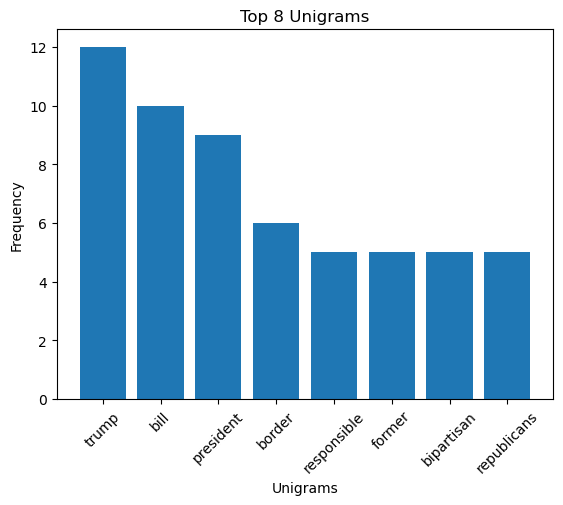

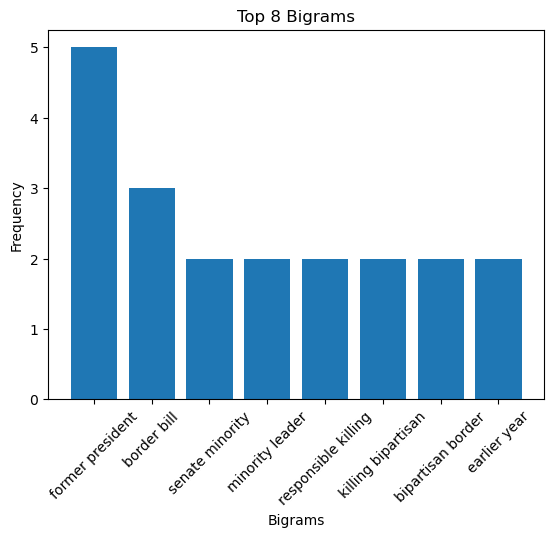

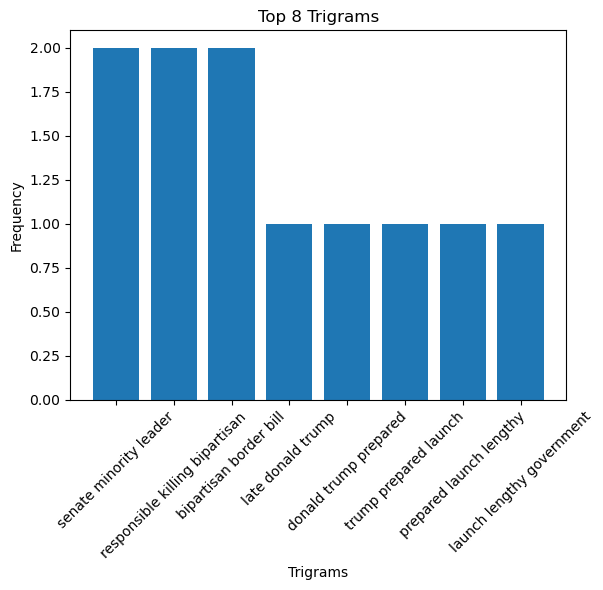

In [68]:
#Draw a histogram of top 8 unigrams
top8unigrams = mostcommonunigrams.most_common(8)
top8unigrams_keys = []
top8unigrams_values = []
import re
for i in range(len(top8unigrams)):
    #print(top3unigrams[i][0][0])
    top8unigrams_keys.append(top8unigrams[i][0][0])
    top8unigrams_values.append(top8unigrams[i][1])

#print(top3unigrams_keys)
#print(top3unigrams_values)

import matplotlib.pyplot as plt

plt.bar(top8unigrams_keys, top8unigrams_values)
plt.title("Top 8 Unigrams")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

#########################################
# Draw a histogram of top 8 bigrams
top8bigrams = mostcommonbigrams.most_common(8)
top8bigrams_keys = []
top8bigrams_values = []

for i in range(len(top8bigrams)):
    top8bigrams_keys.append(" ".join(top8bigrams[i][0]))  # Join the bigram tuple into a string
    top8bigrams_values.append(top8bigrams[i][1])

plt.bar(top8bigrams_keys, top8bigrams_values)
plt.title("Top 8 Bigrams")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

################

# Draw a histogram of top 8 trigrams
top8trigrams = mostcommontrigrams.most_common(8)
top8trigrams_keys = []
top8trigrams_values = []

for i in range(len(top8trigrams)):
    top8trigrams_keys.append(" ".join(top8trigrams[i][0]))  # Join the trigram tuple into a string
    top8trigrams_values.append(top8trigrams[i][1])

import matplotlib.pyplot as plt

plt.bar(top8trigrams_keys, top8trigrams_values)
plt.title("Top 8 Trigrams")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()



# Comparing Guns

In [69]:
# Town Hall

import pandas
import re
import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


#I am creating an empty dictionary here
inputdata = {}
#header is my first row in the csv file that is why hesder is 0 below   ## ADDING ENCODING TO BYPASS ERROR
inputdata = pandas.read_csv('TownHall_guns.csv', encoding='latin-1',header=[0], index_col=0).to_dict()

#we can use type to check the data type of input data variable
#print(type(inputdata))

#I created a new dictionaru below for the Text column in the csv file
textdictionary = inputdata.get("text")

#I am converting dictionary to a list so I can analyze the data
textlist = list(textdictionary.values())

#convert text to lower case
textlist_lowercase = [str(i).lower() for i in textlist]

#remove special characters
textlist_lowercase = [re.sub(r"[^a-zA-Z]", " ", text) for text in textlist_lowercase]

CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in textlist_lowercase :
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

reviewswithoutlinks=[]
#Remove links
for text in cleanedreviews:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        reviewswithoutlinks.append(remove_com)

#Remove special characters
reviewswithoutlinks = [unidecode.unidecode(text) for text in reviewswithoutlinks]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in reviewswithoutlinks]
#This is how we can remove individual words that does not make sense from the wordcloud
cleantext = [re.sub("Came"," ",text) for text in reviewswithoutlinks]
cleantext = [re.sub("came"," ",text) for text in reviewswithoutlinks]

#Test it make sure the text is indeed clean!
#print(cleantext)

#Convert list to string. Most text analysis libraries require input to be a string
textinstring = ""
for eachletter in cleantext:
    textinstring += ''+ str(eachletter)

text_tokens = word_tokenize(textinstring)

text_tokens_without_stopwords = [word for word in text_tokens if not word in stopwords.words()]

#print(text_tokens_without_stopwords)

unigrams = ngrams(text_tokens_without_stopwords , 1)
bigrams = ngrams(text_tokens_without_stopwords ,2)
trigrams = ngrams(text_tokens_without_stopwords ,3)

mostcommonunigrams = Counter(unigrams)
#This will print top 3 unigrams
print(mostcommonunigrams.most_common(8))

mostcommonbigrams = Counter(bigrams)
print(mostcommonbigrams.most_common(8))

mostcommontrigrams = Counter(trigrams)
print(mostcommontrigrams.most_common(8))

print("done")


[(('gun',), 14), (('harris',), 10), (('rights',), 7), (('laws',), 7), (('owners',), 5), (('americans',), 4), (('firearms',), 4), (('defense',), 4)]
[(('gun', 'owners'), 5), (('law', 'abiding'), 4), (('personal', 'safety'), 2), (('anti', 'gun'), 2), (('gun', 'control'), 2), (('gun', 'ownership'), 2), (('red', 'flag'), 2), (('flag', 'laws'), 2)]
[(('red', 'flag', 'laws'), 2), (('law', 'abiding', 'citizens'), 2), (('campaign', 'president', 'united'), 1), (('president', 'united', 'states'), 1), (('united', 'states', 'vice'), 1), (('states', 'vice', 'president'), 1), (('vice', 'president', 'kamala'), 1), (('president', 'kamala', 'harris'), 1)]
done


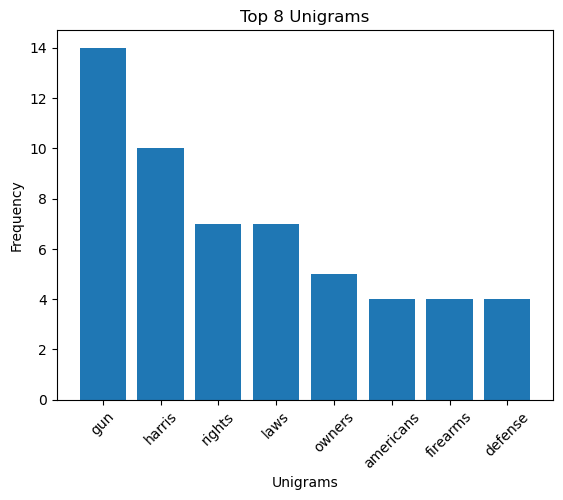

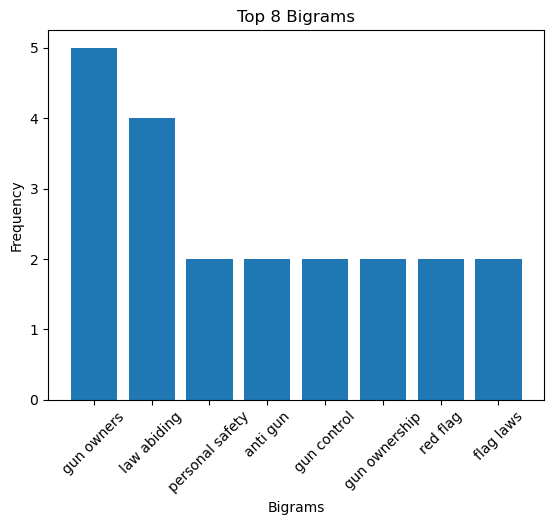

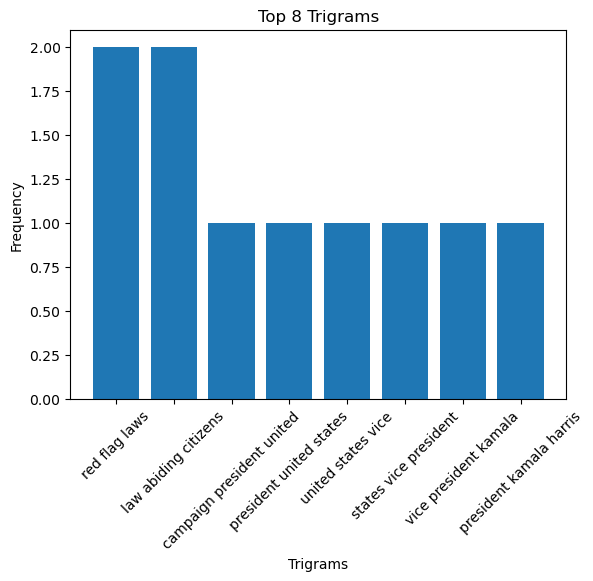

In [70]:
#Draw a histogram of top 8 unigrams
top8unigrams = mostcommonunigrams.most_common(8)
top8unigrams_keys = []
top8unigrams_values = []
import re
for i in range(len(top8unigrams)):
    #print(top3unigrams[i][0][0])
    top8unigrams_keys.append(top8unigrams[i][0][0])
    top8unigrams_values.append(top8unigrams[i][1])

#print(top3unigrams_keys)
#print(top3unigrams_values)

import matplotlib.pyplot as plt

plt.bar(top8unigrams_keys, top8unigrams_values)
plt.title("Top 8 Unigrams")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

#########################################
# Draw a histogram of top 8 bigrams
top8bigrams = mostcommonbigrams.most_common(8)
top8bigrams_keys = []
top8bigrams_values = []

for i in range(len(top8bigrams)):
    top8bigrams_keys.append(" ".join(top8bigrams[i][0]))  # Join the bigram tuple into a string
    top8bigrams_values.append(top8bigrams[i][1])

plt.bar(top8bigrams_keys, top8bigrams_values)
plt.title("Top 8 Bigrams")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

################

# Draw a histogram of top 8 trigrams
top8trigrams = mostcommontrigrams.most_common(8)
top8trigrams_keys = []
top8trigrams_values = []

for i in range(len(top8trigrams)):
    top8trigrams_keys.append(" ".join(top8trigrams[i][0]))  # Join the trigram tuple into a string
    top8trigrams_values.append(top8trigrams[i][1])

import matplotlib.pyplot as plt

plt.bar(top8trigrams_keys, top8trigrams_values)
plt.title("Top 8 Trigrams")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()



In [71]:
# Vox

import pandas
import re
import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


#I am creating an empty dictionary here
inputdata = {}
#header is my first row in the csv file that is why hesder is 0 below   ## ADDING ENCODING TO BYPASS ERROR
inputdata = pandas.read_csv('Vox_guns.csv', encoding='latin-1',header=[0], index_col=0).to_dict()

#we can use type to check the data type of input data variable
#print(type(inputdata))

#I created a new dictionaru below for the Text column in the csv file
textdictionary = inputdata.get("text")

#I am converting dictionary to a list so I can analyze the data
textlist = list(textdictionary.values())

#convert text to lower case
textlist_lowercase = [str(i).lower() for i in textlist]

#remove special characters
textlist_lowercase = [re.sub(r"[^a-zA-Z]", " ", text) for text in textlist_lowercase]

CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in textlist_lowercase :
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

reviewswithoutlinks=[]
#Remove links
for text in cleanedreviews:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        reviewswithoutlinks.append(remove_com)

#Remove special characters
reviewswithoutlinks = [unidecode.unidecode(text) for text in reviewswithoutlinks]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in reviewswithoutlinks]
#This is how we can remove individual words that does not make sense from the wordcloud
cleantext = [re.sub("Came"," ",text) for text in reviewswithoutlinks]
cleantext = [re.sub("came"," ",text) for text in reviewswithoutlinks]

#Test it make sure the text is indeed clean!
#print(cleantext)

#Convert list to string. Most text analysis libraries require input to be a string
textinstring = ""
for eachletter in cleantext:
    textinstring += ''+ str(eachletter)

text_tokens = word_tokenize(textinstring)

text_tokens_without_stopwords = [word for word in text_tokens if not word in stopwords.words()]

#print(text_tokens_without_stopwords)

unigrams = ngrams(text_tokens_without_stopwords , 1)
bigrams = ngrams(text_tokens_without_stopwords ,2)
trigrams = ngrams(text_tokens_without_stopwords ,3)

mostcommonunigrams = Counter(unigrams)
#This will print top 3 unigrams
print(mostcommonunigrams.most_common(8))

mostcommonbigrams = Counter(bigrams)
print(mostcommonbigrams.most_common(8))

mostcommontrigrams = Counter(trigrams)
print(mostcommontrigrams.most_common(8))

print("done")


[(('gun',), 21), (('guns',), 10), (('harris',), 8), (('owners',), 7), (('americans',), 6), (('away',), 5), (('women',), 4), (('regulation',), 4)]
[(('gun', 'owners'), 7), (('guns', 'away'), 5), (('millions', 'americans'), 3), (('gun', 'owner'), 2), (('law', 'enforcement'), 2), (('banning', 'assault'), 2), (('assault', 'weapons'), 2), (('universal', 'background'), 2)]
[(('banning', 'assault', 'weapons'), 2), (('universal', 'background', 'checks'), 2), (('millions', 'americans', 'guns'), 2), (('vice', 'president', 'kamala'), 1), (('president', 'kamala', 'harris'), 1), (('kamala', 'harris', 'quick'), 1), (('harris', 'quick', 'comeback'), 1), (('quick', 'comeback', 'donald'), 1)]
done


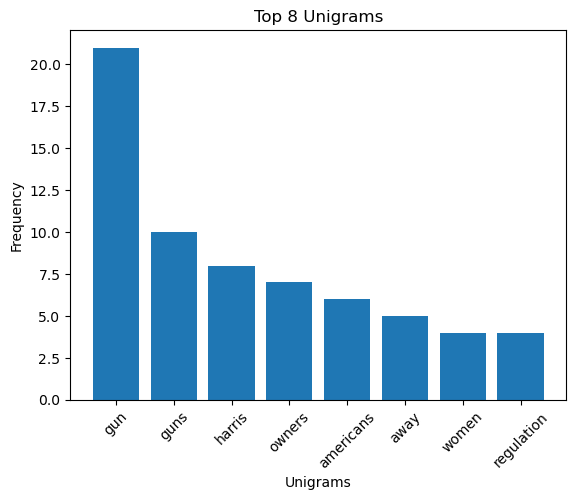

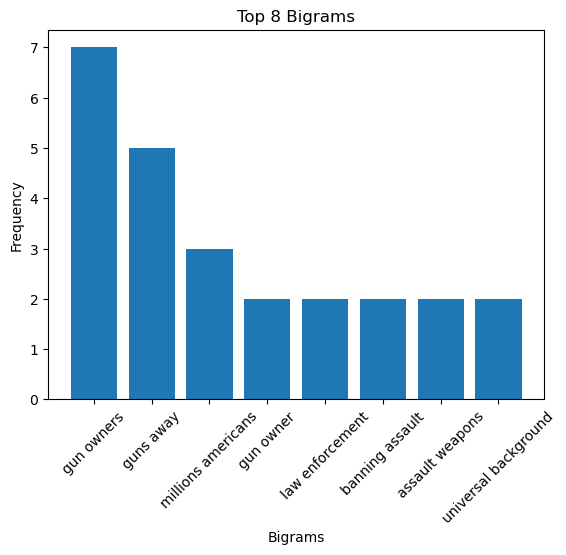

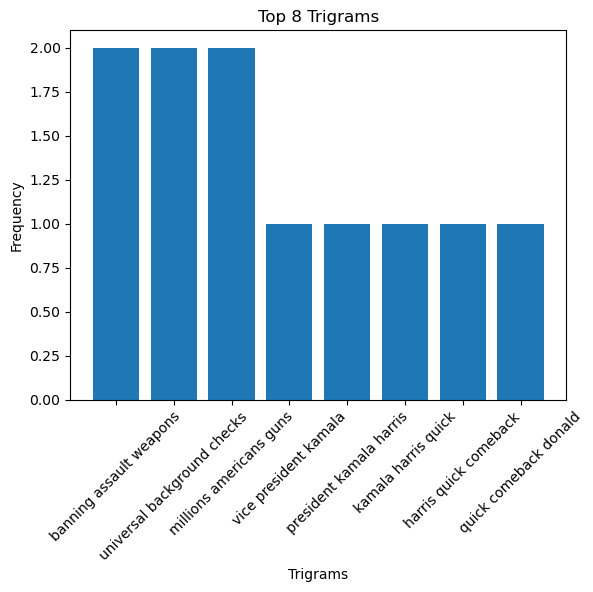

In [72]:
#Draw a histogram of top 8 unigrams
top8unigrams = mostcommonunigrams.most_common(8)
top8unigrams_keys = []
top8unigrams_values = []
import re
for i in range(len(top8unigrams)):
    #print(top3unigrams[i][0][0])
    top8unigrams_keys.append(top8unigrams[i][0][0])
    top8unigrams_values.append(top8unigrams[i][1])

#print(top3unigrams_keys)
#print(top3unigrams_values)

import matplotlib.pyplot as plt

plt.bar(top8unigrams_keys, top8unigrams_values)
plt.title("Top 8 Unigrams")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

#########################################
# Draw a histogram of top 8 bigrams
top8bigrams = mostcommonbigrams.most_common(8)
top8bigrams_keys = []
top8bigrams_values = []

for i in range(len(top8bigrams)):
    top8bigrams_keys.append(" ".join(top8bigrams[i][0]))  # Join the bigram tuple into a string
    top8bigrams_values.append(top8bigrams[i][1])

plt.bar(top8bigrams_keys, top8bigrams_values)
plt.title("Top 8 Bigrams")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

################

# Draw a histogram of top 8 trigrams
top8trigrams = mostcommontrigrams.most_common(8)
top8trigrams_keys = []
top8trigrams_values = []

for i in range(len(top8trigrams)):
    top8trigrams_keys.append(" ".join(top8trigrams[i][0]))  # Join the trigram tuple into a string
    top8trigrams_values.append(top8trigrams[i][1])

import matplotlib.pyplot as plt

plt.bar(top8trigrams_keys, top8trigrams_values)
plt.title("Top 8 Trigrams")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()



['vice', 'president', 'kamala', 'harris', 'quick', 'comeback', 'donald', 'trump', 'accused', 'wanting', 'guns', 'away', 'tuesday', 'debate', 'tim', 'walz', 'gun', 'owners', 'taking', 'guns', 'away', 'stop', 'continuous', 'lying', 'stuff', 'harris', 'remark', 'caught', 'attention', 'online', 'news', 'harris', 'spoken', 'gun', 'owner', 'campaign', 'president', 'gun', 'owner', 'gun', 'probably', 'reason', 'lot', 'personal', 'safety', 'harris', 'told', 'reporters', 'campaign', 'event', 'time', 'harris', 'pointed', 'career', 'prosecutor', 'explanation', 'unusual', 'work', 'law', 'enforcement', 'parole', 'officers', 'police', 'chief', 'law', 'enforcement', 'officers', 'gun', 'concern', 'encountered', 'legal', 'system', 'exact', 'revenge', 'happened', 'surprise', 'reason', 'altogether', 'harris', 'multiracial', 'woman', 'liberal', 'state', 'called', 'banning', 'assault', 'weapons', 'passing', 'universal', 'background', 'checks', 'shocking', 'wrote', 'feature', 'month', 'millions', 'americans'

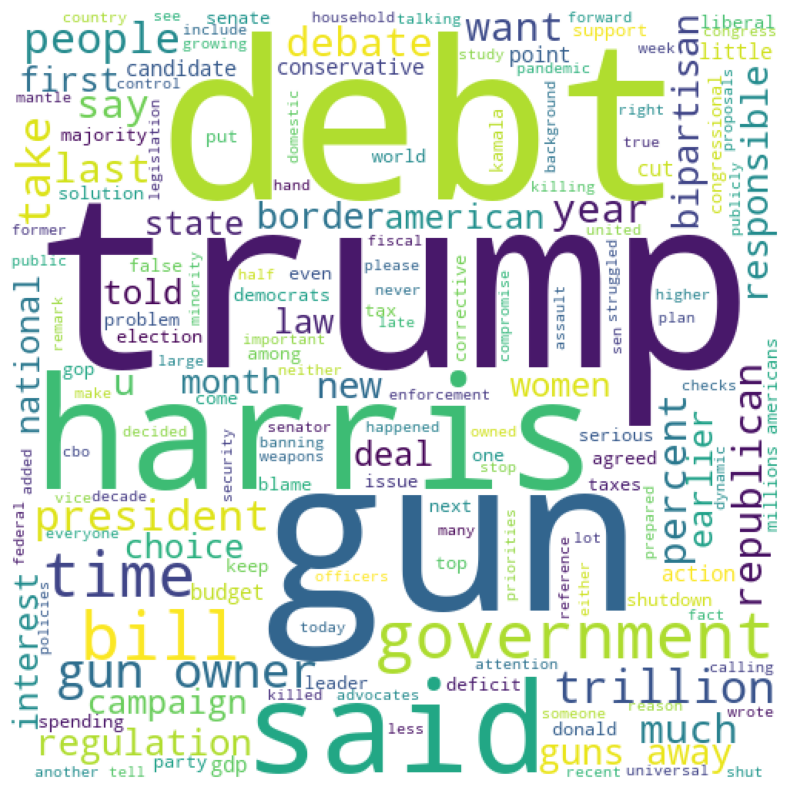

<AxesSubplot:title={'center':'Top Frequency Word Tokens in Text'}, xlabel='Samples', ylabel='Counts'>

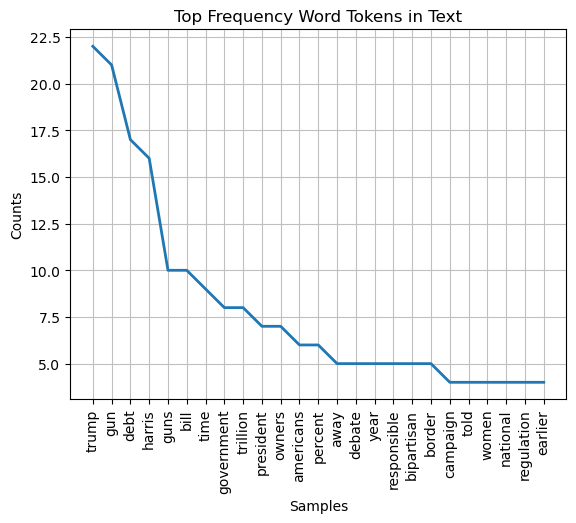

In [249]:
# Create a left-cloud 
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

alj = pandas.read_csv('Al-jazeera debt.csv',header=[0], index_col=0)
msnbc = pandas.read_csv('MSNBC border.csv',header=[0], index_col=0)
vox = pandas.read_csv('Vox_guns.csv',header=[0], index_col=0)

vox['text']

my_cloud = ""

for text in vox['text']:
    my_cloud+=text

for text in msnbc['text'][0]:  # Index added due to formatting issue with scrapes 
    my_cloud+=text

for text in alj['text'][0]:
    my_cloud+=text
    
textlist_lowercase = my_cloud.lower()
textlist_lowercase = [textlist_lowercase]
textlist_lowercase

#remove special characters
textlist_lowercase = [re.sub(r"[^a-zA-Z]", " ", text) for text in textlist_lowercase]

CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in textlist_lowercase:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)


#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in cleanedreviews]
#This is how we can remove individual words that does not make sense from the wordcloud
cleantext = [re.sub("Came"," ",text) for text in cleanedreviews]
cleantext = [re.sub("came"," ",text) for text in cleanedreviews]

#Test it make sure the text is indeed clean!
#print(cleantext)

#Convert list to string. Most text analysis libraries require input to be a string
textinstring = ""
for eachletter in cleantext:
    textinstring += ''+ str(eachletter)

text_tokens = word_tokenize(textinstring)

text_tokens_without_stopwords = [word for word in text_tokens if not word in stopwords.words()]

print(text_tokens_without_stopwords)

#World cloud requires a string as input
wordcloud = WordCloud(width = 500, height = 500,
            background_color ='white',
            min_font_size = 10).generate(textinstring )

plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

import nltk
diagramdata = nltk.FreqDist(text_tokens_without_stopwords)
#25 below means top 25 words from text 
diagramdata.plot(25, title="Top Frequency Word Tokens in Text")


['vice', 'president', 'kamala', 'harris', 'stumbled', 'biden', 'harris', 'administration', 'border', 'immigration', 'policies', 'pressed', 'border', 'crisis', 'cnn', 'town', 'hall', 'moderated', 'anderson', 'cooper', 'talk', 'compromise', 'bill', 'pass', 'elected', 'priority', 'includes', 'million', 'funding', 'border', 'wall', 'republicans', 'wanted', 'part', 'compromise', 'donald', 'trumpin', 'campaign', 'president', 'united', 'states', 'vice', 'president', 'kamala', 'harris', 'undergone', 'significant', 'policy', 'shifts', 'stark', 'recent', 'stance', 'firearm', 'ownership', 'debate', 'stage', 'interviews', 'influential', 'figures', 'oprah', 'minutes', 'harris', 'emphasized', 'identity', 'gun', 'owner', 'despite', 'spent', 'career', 'advocating', 'policies', 'restrict', 'rights', 'gun', 'owners', 'san', 'francisco', 'district', 'attorney', 'harris', 'supported', 'proposition', 'measure', 'banned', 'handguns', 'city', 'struck', 'courts', 'contradiction', 'highlights', 'broader', 'tre

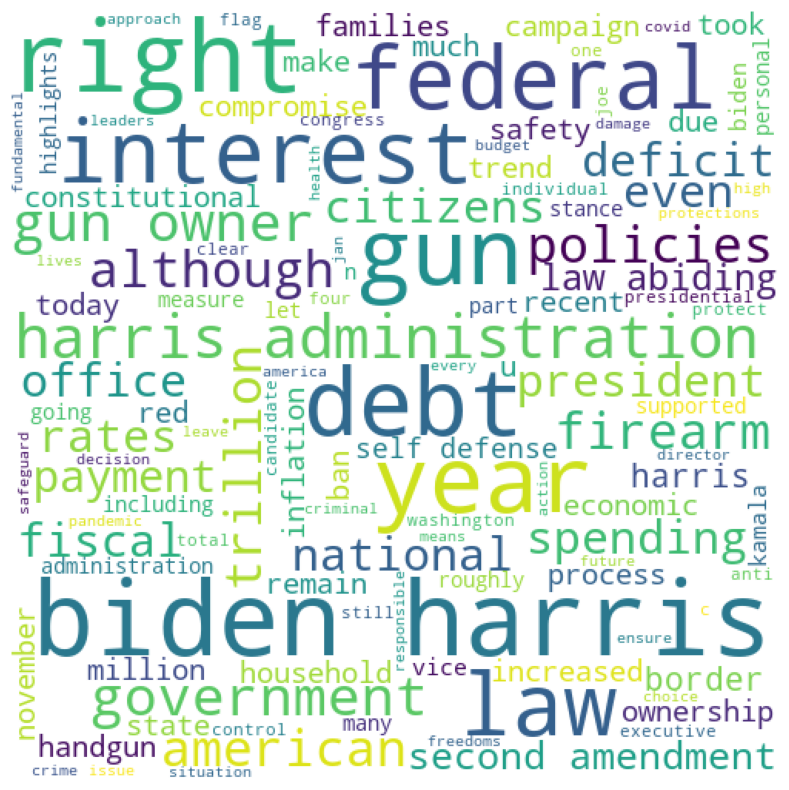

<AxesSubplot:title={'center':'Top Frequency Word Tokens in Text'}, xlabel='Samples', ylabel='Counts'>

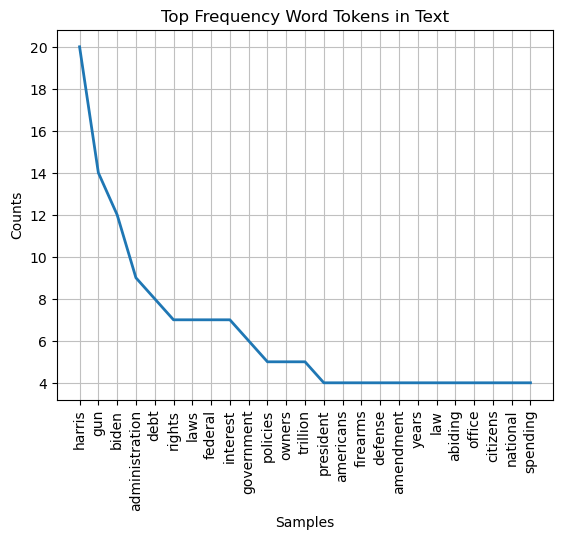

In [250]:
# Create a right-cloud 

import matplotlib.pyplot as plt
from wordcloud import WordCloud

fox = pandas.read_csv('Fox border.csv', encoding='latin-1',header=[0], index_col=0)
th = pandas.read_csv('TownHall_guns.csv',encoding='latin-1',header=[0], index_col=0)
ds = pandas.read_csv('Daily Signal_debt.csv', encoding='latin-1',header=[0], index_col=0)

my_cloud = ""

for text in fox['text'][0]:
    my_cloud+=text

for text in th['text']:
    my_cloud+=text

for text in ds['text']:
    my_cloud+=text

textlist_lowercase = my_cloud.lower()
textlist_lowercase = [textlist_lowercase]
textlist_lowercase

#remove special characters
textlist_lowercase = [re.sub(r"[^a-zA-Z]", " ", text) for text in textlist_lowercase]

CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in textlist_lowercase:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)


#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in cleanedreviews]
#This is how we can remove individual words that does not make sense from the wordcloud
#cleantext = [re.sub("Came"," ",text) for text in cleanedreviews]
cleantext = [re.sub("came"," ",text) for text in cleanedreviews]



#Test it make sure the text is indeed clean!
#print(cleantext)

#Convert list to string. Most text analysis libraries require input to be a string
textinstring = ""
for eachletter in cleantext:
    textinstring += ''+ eachletter

text_tokens = word_tokenize(textinstring)

text_tokens_without_stopwords = [word for word in text_tokens if not word in stopwords.words()]

print(text_tokens_without_stopwords)


#World cloud requires a string as input
wordcloud = WordCloud(width = 500, height = 500,
            background_color ='white',
            min_font_size = 10).generate(textinstring)

plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

import nltk
diagramdata = nltk.FreqDist(text_tokens_without_stopwords)
#25 below means top 25 words from text 
diagramdata.plot(25, title="Top Frequency Word Tokens in Text")



In [2]:
!pip install textblob
!pip install vaderSentiment
!pip install textstat

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)
  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)
  Obtaining dependency information for textstat from https://files.pythonhosted.org/packages/11/df/bb284dfb23890319ace2a416a5a39e77e29b8f52f5d80bc13b12dc1fc1f5/textstat-0.7.4-py3-none-any.whl.metadata
  Obtaining dependency information for pyphen from https://files.pythonhosted.org/packages/52/34/839a8cb56f145abf2da52ba4607b0e45b79fa018cb154fcba149fb76f179/pyphen-0.16.0-py3-none-any.whl.metadata
Using cached textstat-0.7.4-py3-none-any.whl (105 k

In [5]:
# Al Jazeera

import pandas
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import csv
import textstat

fname = 'Al-jazeera debt.csv'


#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pandas.read_csv(fname, header=[0]).to_dict()

# print(inputdata)

#We can use type to check the data type of a variable
# print(type(inputdata))

#I am using the column headers from the csv file to find the data I am interested to analyze
# I created a new dictionary here for the description column in my csv file
blogtextdictionary = inputdata.get('text')

#I am converting the decription from dictionary to a list for the sentiment analyses below
blogtextlist =  list(blogtextdictionary.values())

# Iterate conversion to string 
for i in range(len(blogtextlist)):
    blogtextlist[i] = str(blogtextlist[i])
    # print(type(blogtextlist[i]))

textblob_results_list=[]
vader_results_list=[]

for i in range(len(blogtextlist)):
    #This is TextBlob Based Sentiment Analysis
    textblob_analyze_polarity = TextBlob(blogtextlist[i]).polarity
    textblob_analyze_subjectivity = TextBlob(blogtextlist[i]).subjectivity
    #polarity values range from -1 to 1 where -1.0 is negative polarity and 1.0 is positive
    #Subjectivity/objectivity  values range from 0.0 to 1.0 where 0.0 is very objective and 1.0 is very subjective
    #print("Polarity: ", textblob_analyze_polarity)
    #print("Subjectivity: ",textblob_analyze_subjectivity)

    textblob_result = {"TextBlob Polarity Score":textblob_analyze_polarity,"TextBlob Subjectivity Score": textblob_analyze_subjectivity}
    textblob_results_list.append(textblob_result)

    #This is Vader Based Sentiment Analysis
    #Vader provides 4 results labeled as negative, neutral, positive, and compound(overall)
    vader_sentiment_analysis = SentimentIntensityAnalyzer().polarity_scores(blogtextlist[i])
    vader_results_list.append(vader_sentiment_analysis)
    #In Vader the compound score is the sum of positive, negative, and neutral scores which is then
    #normalized between -1 [most extreme negative] and 1[most extreme positive]
    #negative represents negative aspects of a tweet
    #positive represents positive aspects of a tweet
    #neutral represents neutral aspects of a tweet
    #print("Polarity Scores in Vader: ", vader_sentiment_analysis)

#This is the TextBlob Sentiment Analysis Results
textblobresults = pandas.DataFrame(textblob_results_list)

#This is the Vader Sentiment Analysis Results
vaderresults = pandas.DataFrame(vader_results_list)
#print(textblobresults['TextBlob Polarity Score'])
#print(vaderresults['neg'])

# file = pandas.read_csv(fname)


###


#I am converting the decription from dictionary to a list for the sentiment analyses below
textlist =  list(blogtextdictionary.values())

for i in range(len(textlist)):
    textlist[i] = str(textlist[i])
    # print(type(textlist[i]))


flesch_reading_ease_results_list=[]
gunning_fog_results_list=[]

for i in range(len(textlist)):
    flesch_reading_ease_score=textstat.flesch_reading_ease(textlist[i])
    gunning_fog_score=textstat.gunning_fog(textlist[i])
    flesch_reading_ease_results_list.append(flesch_reading_ease_score)
    gunning_fog_results_list.append(gunning_fog_score)

flesch_reading_ease_results = pandas.DataFrame(flesch_reading_ease_results_list)
gunning_fog_results = pandas.DataFrame(gunning_fog_results_list)

file = pandas.read_csv(fname)

# Vader/Textblob
file['TextBlob Polarity Score'] = textblobresults['TextBlob Polarity Score']
file['TextBlob Subjectivity Score'] = textblobresults['TextBlob Subjectivity Score']
file['Vader Negative Polarity Score'] = vaderresults['neg']
file['Vader Neutral Polarity Score'] = vaderresults['neu']
file['Vader Positive Polarity Score'] = vaderresults['pos']
file['Vader Compound Polarity Score'] = vaderresults['compound']

# Text/Stat
file['Flesch Reading Ease Score'] = flesch_reading_ease_results
file['Gunning_Fog Score'] = gunning_fog_results


###

fname_clipped = fname.rsplit('.', 1)[0]


#Index is false because example 1.csv file already has an index column
file.to_csv(f'{fname_clipped}_blob.csv', index=True, index_label="Index")

print("done")


done


In [122]:
# Daily Signal

import pandas
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import csv
import textstat

fname = 'Daily Signal_debt.csv'
fname_clipped = fname.rsplit('.', 1)[0]


#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pandas.read_csv('Daily Signal_debt.csv', encoding='latin-1',header=[0])

# print(inputdata)

#We can use type to check the data type of a variable
# print(type(inputdata))

#I am using the column headers from the csv file to find the data I am interested to analyze
# I created a new dictionary here for the description column in my csv file
blogtextdictionary = inputdata.get('text')

#I am converting the decription from dictionary to a list for the sentiment analyses below

debug =[]

for text in blogtextdictionary:
    debug.append(text)

blogtextlist =  debug

# Iterate conversion to string 
for i in range(len(blogtextlist)):
    blogtextlist[i] = str(blogtextlist[i])
    #print(blogtextlist[i])

textblob_results_list=[]
vader_results_list=[]

for i in range(len(blogtextlist)):
    #This is TextBlob Based Sentiment Analysis
    textblob_analyze_polarity = TextBlob(blogtextlist[i]).polarity
    textblob_analyze_subjectivity = TextBlob(blogtextlist[i]).subjectivity
    #polarity values range from -1 to 1 where -1.0 is negative polarity and 1.0 is positive
    #Subjectivity/objectivity  values range from 0.0 to 1.0 where 0.0 is very objective and 1.0 is very subjective
    #print("Polarity: ", textblob_analyze_polarity)
    #print("Subjectivity: ",textblob_analyze_subjectivity)

    textblob_result = {"TextBlob Polarity Score":textblob_analyze_polarity,"TextBlob Subjectivity Score": textblob_analyze_subjectivity}
    textblob_results_list.append(textblob_result)

    #This is Vader Based Sentiment Analysis
    #Vader provides 4 results labeled as negative, neutral, positive, and compound(overall)
    vader_sentiment_analysis = SentimentIntensityAnalyzer().polarity_scores(blogtextlist[i])
    vader_results_list.append(vader_sentiment_analysis)
    #In Vader the compound score is the sum of positive, negative, and neutral scores which is then
    #normalized between -1 [most extreme negative] and 1[most extreme positive]
    #negative represents negative aspects of a tweet
    #positive represents positive aspects of a tweet
    #neutral represents neutral aspects of a tweet
    #print("Polarity Scores in Vader: ", vader_sentiment_analysis)

#This is the TextBlob Sentiment Analysis Results
textblobresults = pandas.DataFrame(textblob_results_list)

#This is the Vader Sentiment Analysis Results
vaderresults = pandas.DataFrame(vader_results_list)
#print(textblobresults['TextBlob Polarity Score'])
#print(vaderresults['neg'])

# file = pandas.read_csv(fname)


###


#I am converting the decription from dictionary to a list for the sentiment analyses below
textlist =  debug

for i in range(len(textlist)):
    textlist[i] = str(textlist[i])
    #print(textlist[i])


flesch_reading_ease_results_list=[]
gunning_fog_results_list=[]

for i in range(len(textlist)):
    flesch_reading_ease_score=textstat.flesch_reading_ease(textlist[i])
    gunning_fog_score=textstat.gunning_fog(textlist[i])
    flesch_reading_ease_results_list.append(flesch_reading_ease_score)
    gunning_fog_results_list.append(gunning_fog_score)

flesch_reading_ease_results = pandas.DataFrame(flesch_reading_ease_results_list)
gunning_fog_results = pandas.DataFrame(gunning_fog_results_list)

file = pandas.read_csv('Daily Signal_debt.csv', encoding='latin-1')

# Vader/Textblob
tps = textblobresults['TextBlob Polarity Score'][0]
tss = textblobresults['TextBlob Subjectivity Score'][0]
vng = vaderresults['neg'][0]
vnn = vaderresults['neu'][0]
vpo = vaderresults['pos'][0]
vc = vaderresults['compound'][0]

# Text/Stat
fre= flesch_reading_ease_results.iloc[0].iloc[0]
gfr = gunning_fog_results.iloc[0].iloc[0]

#print(type(inputdata))
#print(inputdata.columns)

my_title = inputdata['title'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')
my_author = inputdata['author'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')
my_image = inputdata['image'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')
my_caption = inputdata['caption'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')
my_text = inputdata['text'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')



# Create a CSV file and write the data
with open(f'{fname_clipped}_blob.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    
    # Write the header
    writer.writerow(['title','author','image','caption','text','TextBlob Polarity Score','TextBlob Subjectivity Score','Vader Negative Polarity Score','Vader Neutral Polarity Score','Vader Positive Polarity Score','Vader Compound Polarity Score','Flesch Reading Ease Score','Gunning_Fog Score'])
    
    
    # Write the article data
    writer.writerow([my_title, my_author,my_image, my_caption,my_text, tps,tss,vng,vnn,vpo,vc, fre, gfr ])
###


#Index is false because example 1.csv file already has an index column
#file.to_csv(f'{fname_clipped}_blob.csv', index=True, index_label="Index")

print("done")


done


In [129]:
# Fox

import pandas
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import csv
import textstat

fname = 'MSNBC border.csv'
fname_clipped = fname.rsplit('.', 1)[0]


#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pandas.read_csv(fname, encoding='latin-1',header=[0])

# print(inputdata)

#We can use type to check the data type of a variable
# print(type(inputdata))

#I am using the column headers from the csv file to find the data I am interested to analyze
# I created a new dictionary here for the description column in my csv file
blogtextdictionary = inputdata.get('text')

#I am converting the decription from dictionary to a list for the sentiment analyses below

debug =[]

for text in blogtextdictionary:
    debug.append(text)

blogtextlist =  debug

# Iterate conversion to string 
for i in range(len(blogtextlist)):
    blogtextlist[i] = str(blogtextlist[i])
    #print(blogtextlist[i])

textblob_results_list=[]
vader_results_list=[]

for i in range(len(blogtextlist)):
    #This is TextBlob Based Sentiment Analysis
    textblob_analyze_polarity = TextBlob(blogtextlist[i]).polarity
    textblob_analyze_subjectivity = TextBlob(blogtextlist[i]).subjectivity
    #polarity values range from -1 to 1 where -1.0 is negative polarity and 1.0 is positive
    #Subjectivity/objectivity  values range from 0.0 to 1.0 where 0.0 is very objective and 1.0 is very subjective
    #print("Polarity: ", textblob_analyze_polarity)
    #print("Subjectivity: ",textblob_analyze_subjectivity)

    textblob_result = {"TextBlob Polarity Score":textblob_analyze_polarity,"TextBlob Subjectivity Score": textblob_analyze_subjectivity}
    textblob_results_list.append(textblob_result)

    #This is Vader Based Sentiment Analysis
    #Vader provides 4 results labeled as negative, neutral, positive, and compound(overall)
    vader_sentiment_analysis = SentimentIntensityAnalyzer().polarity_scores(blogtextlist[i])
    vader_results_list.append(vader_sentiment_analysis)
    #In Vader the compound score is the sum of positive, negative, and neutral scores which is then
    #normalized between -1 [most extreme negative] and 1[most extreme positive]
    #negative represents negative aspects of a tweet
    #positive represents positive aspects of a tweet
    #neutral represents neutral aspects of a tweet
    #print("Polarity Scores in Vader: ", vader_sentiment_analysis)

#This is the TextBlob Sentiment Analysis Results
textblobresults = pandas.DataFrame(textblob_results_list)

#This is the Vader Sentiment Analysis Results
vaderresults = pandas.DataFrame(vader_results_list)
#print(textblobresults['TextBlob Polarity Score'])
#print(vaderresults['neg'])

# file = pandas.read_csv(fname)


###


#I am converting the decription from dictionary to a list for the sentiment analyses below
textlist =  debug

for i in range(len(textlist)):
    textlist[i] = str(textlist[i])
    #print(textlist[i])


flesch_reading_ease_results_list=[]
gunning_fog_results_list=[]

for i in range(len(textlist)):
    flesch_reading_ease_score=textstat.flesch_reading_ease(textlist[i])
    gunning_fog_score=textstat.gunning_fog(textlist[i])
    flesch_reading_ease_results_list.append(flesch_reading_ease_score)
    gunning_fog_results_list.append(gunning_fog_score)

flesch_reading_ease_results = pandas.DataFrame(flesch_reading_ease_results_list)
gunning_fog_results = pandas.DataFrame(gunning_fog_results_list)

inputdata = pandas.read_csv(fname, encoding='latin-1')

# Vader/Textblob
tps = textblobresults['TextBlob Polarity Score'][0]
tss = textblobresults['TextBlob Subjectivity Score'][0]
vng = vaderresults['neg'][0]
vnn = vaderresults['neu'][0]
vpo = vaderresults['pos'][0]
vc = vaderresults['compound'][0]

# Text/Stat
fre= flesch_reading_ease_results.iloc[0].iloc[0]
gfr = gunning_fog_results.iloc[0].iloc[0]



# Inputting column names 
inputdata.columns = ["title", "author", "Author_link", "date", "text"]
print(inputdata.columns)


my_title = inputdata['title'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')
my_author = inputdata['author'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')
# my_image = inputdata['image'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')
# my_caption = inputdata['caption'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')
my_text = inputdata['text'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')



# Create a CSV file and write the data
with open(f'{fname_clipped}_blob.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    
    # Write the header
    writer.writerow(['title','author','text','TextBlob Polarity Score','TextBlob Subjectivity Score','Vader Negative Polarity Score','Vader Neutral Polarity Score','Vader Positive Polarity Score','Vader Compound Polarity Score','Flesch Reading Ease Score','Gunning_Fog Score'])
    
    
    # Write the article data
    writer.writerow([my_title, my_author,my_text, tps,tss,vng,vnn,vpo,vc, fre, gfr ])
###


#Index is false because example 1.csv file already has an index column
#file.to_csv(f'{fname_clipped}_blob.csv', index=True, index_label="Index")

print("done")


Index(['title', 'author', 'Author_link', 'date', 'text'], dtype='object')
done


In [141]:
# Fox

import pandas
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import csv
import textstat

fname = 'Fox border.csv'
fname_clipped = fname.rsplit('.', 1)[0]


#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pandas.read_csv(fname, encoding='latin-1',header=[0])

# print(inputdata)

#We can use type to check the data type of a variable
# print(type(inputdata))

#I am using the column headers from the csv file to find the data I am interested to analyze
# I created a new dictionary here for the description column in my csv file
blogtextdictionary = inputdata.get('text')

#I am converting the decription from dictionary to a list for the sentiment analyses below

debug =[]

for text in blogtextdictionary:
    debug.append(text)

blogtextlist =  debug

# print(debug)

# Iterate conversion to string 
for i in range(len(blogtextlist)):
    blogtextlist[i] = str(blogtextlist[i])
    #print(blogtextlist[i])

textblob_results_list=[]
vader_results_list=[]

for i in range(len(blogtextlist)):
    #This is TextBlob Based Sentiment Analysis
    textblob_analyze_polarity = TextBlob(blogtextlist[i]).polarity
    textblob_analyze_subjectivity = TextBlob(blogtextlist[i]).subjectivity
    #polarity values range from -1 to 1 where -1.0 is negative polarity and 1.0 is positive
    #Subjectivity/objectivity  values range from 0.0 to 1.0 where 0.0 is very objective and 1.0 is very subjective
    #print("Polarity: ", textblob_analyze_polarity)
    #print("Subjectivity: ",textblob_analyze_subjectivity)

    textblob_result = {"TextBlob Polarity Score":textblob_analyze_polarity,"TextBlob Subjectivity Score": textblob_analyze_subjectivity}
    textblob_results_list.append(textblob_result)

    #This is Vader Based Sentiment Analysis
    #Vader provides 4 results labeled as negative, neutral, positive, and compound(overall)
    vader_sentiment_analysis = SentimentIntensityAnalyzer().polarity_scores(blogtextlist[i])
    vader_results_list.append(vader_sentiment_analysis)
    #In Vader the compound score is the sum of positive, negative, and neutral scores which is then
    #normalized between -1 [most extreme negative] and 1[most extreme positive]
    #negative represents negative aspects of a tweet
    #positive represents positive aspects of a tweet
    #neutral represents neutral aspects of a tweet
    #print("Polarity Scores in Vader: ", vader_sentiment_analysis)

#This is the TextBlob Sentiment Analysis Results
textblobresults = pandas.DataFrame(textblob_results_list)

#This is the Vader Sentiment Analysis Results
vaderresults = pandas.DataFrame(vader_results_list)
#print(textblobresults['TextBlob Polarity Score'])
#print(vaderresults['neg'])

# file = pandas.read_csv(fname)


###


#I am converting the decription from dictionary to a list for the sentiment analyses below
textlist =  debug

for i in range(len(textlist)):
    textlist[i] = str(textlist[i])
    #print(textlist[i])


flesch_reading_ease_results_list=[]
gunning_fog_results_list=[]

for i in range(len(textlist)):
    flesch_reading_ease_score=textstat.flesch_reading_ease(textlist[i])
    gunning_fog_score=textstat.gunning_fog(textlist[i])
    flesch_reading_ease_results_list.append(flesch_reading_ease_score)
    gunning_fog_results_list.append(gunning_fog_score)

flesch_reading_ease_results = pandas.DataFrame(flesch_reading_ease_results_list)
gunning_fog_results = pandas.DataFrame(gunning_fog_results_list)

inputdata = pandas.read_csv(fname, encoding='latin-1').iloc[:,0:7]

# Vader/Textblob
tps = textblobresults['TextBlob Polarity Score'][0] 
tss = textblobresults['TextBlob Subjectivity Score'][0]
vng = vaderresults['neg'][0]
vnn = vaderresults['neu'][0]
vpo = vaderresults['pos'][0]
vc = vaderresults['compound'][0]

# Text/Stat
fre= flesch_reading_ease_results.iloc[0].iloc[0]
gfr = gunning_fog_results.iloc[0].iloc[0]

#print(type(inputdata))
inputdata.columns = ["title", "author", "Author_link", "date", "text", "image", "caption"]


my_title = inputdata['title'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')
my_author = inputdata['author'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')
my_image = inputdata['image'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')
my_caption = inputdata['caption'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')
my_text = inputdata['text'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')



# Create a CSV file and write the data
with open(f'{fname_clipped}_blob.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    
    # Write the header
    writer.writerow(['title','author','image','caption','text','TextBlob Polarity Score','TextBlob Subjectivity Score','Vader Negative Polarity Score','Vader Neutral Polarity Score','Vader Positive Polarity Score','Vader Compound Polarity Score','Flesch Reading Ease Score','Gunning_Fog Score'])
    
    
    # Write the article data
    writer.writerow([my_title, my_author,my_image, my_caption,my_text, tps,tss,vng,vnn,vpo,vc, fre, gfr ])
###


#Index is false because example 1.csv file already has an index column
#file.to_csv(f'{fname_clipped}_blob.csv', index=True, index_label="Index")

print("done")


done


In [145]:
# Townhall

import pandas
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import csv
import textstat

fname = 'TownHall_guns.csv'
fname_clipped = fname.rsplit('.', 1)[0]


#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pandas.read_csv(fname, encoding='latin-1',header=[0])

# print(inputdata)

#We can use type to check the data type of a variable
# print(type(inputdata))

#I am using the column headers from the csv file to find the data I am interested to analyze
# I created a new dictionary here for the description column in my csv file
blogtextdictionary = inputdata.get('text')

#I am converting the decription from dictionary to a list for the sentiment analyses below

debug =[]

for text in blogtextdictionary:
    debug.append(text)

blogtextlist =  debug

# print(debug)

# Iterate conversion to string 
for i in range(len(blogtextlist)):
    blogtextlist[i] = str(blogtextlist[i])
    #print(blogtextlist[i])

textblob_results_list=[]
vader_results_list=[]

for i in range(len(blogtextlist)):
    #This is TextBlob Based Sentiment Analysis
    textblob_analyze_polarity = TextBlob(blogtextlist[i]).polarity
    textblob_analyze_subjectivity = TextBlob(blogtextlist[i]).subjectivity
    #polarity values range from -1 to 1 where -1.0 is negative polarity and 1.0 is positive
    #Subjectivity/objectivity  values range from 0.0 to 1.0 where 0.0 is very objective and 1.0 is very subjective
    #print("Polarity: ", textblob_analyze_polarity)
    #print("Subjectivity: ",textblob_analyze_subjectivity)

    textblob_result = {"TextBlob Polarity Score":textblob_analyze_polarity,"TextBlob Subjectivity Score": textblob_analyze_subjectivity}
    textblob_results_list.append(textblob_result)

    #This is Vader Based Sentiment Analysis
    #Vader provides 4 results labeled as negative, neutral, positive, and compound(overall)
    vader_sentiment_analysis = SentimentIntensityAnalyzer().polarity_scores(blogtextlist[i])
    vader_results_list.append(vader_sentiment_analysis)
    #In Vader the compound score is the sum of positive, negative, and neutral scores which is then
    #normalized between -1 [most extreme negative] and 1[most extreme positive]
    #negative represents negative aspects of a tweet
    #positive represents positive aspects of a tweet
    #neutral represents neutral aspects of a tweet
    #print("Polarity Scores in Vader: ", vader_sentiment_analysis)

#This is the TextBlob Sentiment Analysis Results
textblobresults = pandas.DataFrame(textblob_results_list)

#This is the Vader Sentiment Analysis Results
vaderresults = pandas.DataFrame(vader_results_list)
#print(textblobresults['TextBlob Polarity Score'])
#print(vaderresults['neg'])

# file = pandas.read_csv(fname)


###


#I am converting the decription from dictionary to a list for the sentiment analyses below
textlist =  debug

for i in range(len(textlist)):
    textlist[i] = str(textlist[i])
    #print(textlist[i])


flesch_reading_ease_results_list=[]
gunning_fog_results_list=[]

for i in range(len(textlist)):
    flesch_reading_ease_score=textstat.flesch_reading_ease(textlist[i])
    gunning_fog_score=textstat.gunning_fog(textlist[i])
    flesch_reading_ease_results_list.append(flesch_reading_ease_score)
    gunning_fog_results_list.append(gunning_fog_score)

flesch_reading_ease_results = pandas.DataFrame(flesch_reading_ease_results_list)
gunning_fog_results = pandas.DataFrame(gunning_fog_results_list)

inputdata = pandas.read_csv(fname, encoding='latin-1')

# Vader/Textblob
tps = textblobresults['TextBlob Polarity Score'][0] 
tss = textblobresults['TextBlob Subjectivity Score'][0]
vng = vaderresults['neg'][0]
vnn = vaderresults['neu'][0]
vpo = vaderresults['pos'][0]
vc = vaderresults['compound'][0]

# Text/Stat
fre= flesch_reading_ease_results.iloc[0].iloc[0]
gfr = gunning_fog_results.iloc[0].iloc[0]

#print(type(inputdata))
inputdata.columns = ["title", "author", "date", "image", "caption", "text"]

my_title = inputdata['title'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')
my_author = inputdata['author'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')
my_image = inputdata['image'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')
my_caption = inputdata['caption'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')
my_text = inputdata['text'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')



# Create a CSV file and write the data
with open(f'{fname_clipped}_blob.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    
    # Write the header
    writer.writerow(['title','author','image','caption','text','TextBlob Polarity Score','TextBlob Subjectivity Score','Vader Negative Polarity Score','Vader Neutral Polarity Score','Vader Positive Polarity Score','Vader Compound Polarity Score','Flesch Reading Ease Score','Gunning_Fog Score'])
    
    
    # Write the article data
    writer.writerow([my_title, my_author,my_image, my_caption,my_text, tps,tss,vng,vnn,vpo,vc, fre, gfr ])
###


#Index is false because example 1.csv file already has an index column
#file.to_csv(f'{fname_clipped}_blob.csv', index=True, index_label="Index")

print("done")


done


In [146]:
# Vox

import pandas
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import csv
import textstat

fname = 'Vox_guns.csv'
fname_clipped = fname.rsplit('.', 1)[0]


#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pandas.read_csv(fname, encoding='latin-1',header=[0])

# print(inputdata)

#We can use type to check the data type of a variable
# print(type(inputdata))

#I am using the column headers from the csv file to find the data I am interested to analyze
# I created a new dictionary here for the description column in my csv file
blogtextdictionary = inputdata.get('text')

#I am converting the decription from dictionary to a list for the sentiment analyses below

debug =[]

for text in blogtextdictionary:
    debug.append(text)

blogtextlist =  debug

# print(debug)

# Iterate conversion to string 
for i in range(len(blogtextlist)):
    blogtextlist[i] = str(blogtextlist[i])
    #print(blogtextlist[i])

textblob_results_list=[]
vader_results_list=[]

for i in range(len(blogtextlist)):
    #This is TextBlob Based Sentiment Analysis
    textblob_analyze_polarity = TextBlob(blogtextlist[i]).polarity
    textblob_analyze_subjectivity = TextBlob(blogtextlist[i]).subjectivity
    #polarity values range from -1 to 1 where -1.0 is negative polarity and 1.0 is positive
    #Subjectivity/objectivity  values range from 0.0 to 1.0 where 0.0 is very objective and 1.0 is very subjective
    #print("Polarity: ", textblob_analyze_polarity)
    #print("Subjectivity: ",textblob_analyze_subjectivity)

    textblob_result = {"TextBlob Polarity Score":textblob_analyze_polarity,"TextBlob Subjectivity Score": textblob_analyze_subjectivity}
    textblob_results_list.append(textblob_result)

    #This is Vader Based Sentiment Analysis
    #Vader provides 4 results labeled as negative, neutral, positive, and compound(overall)
    vader_sentiment_analysis = SentimentIntensityAnalyzer().polarity_scores(blogtextlist[i])
    vader_results_list.append(vader_sentiment_analysis)
    #In Vader the compound score is the sum of positive, negative, and neutral scores which is then
    #normalized between -1 [most extreme negative] and 1[most extreme positive]
    #negative represents negative aspects of a tweet
    #positive represents positive aspects of a tweet
    #neutral represents neutral aspects of a tweet
    #print("Polarity Scores in Vader: ", vader_sentiment_analysis)

#This is the TextBlob Sentiment Analysis Results
textblobresults = pandas.DataFrame(textblob_results_list)

#This is the Vader Sentiment Analysis Results
vaderresults = pandas.DataFrame(vader_results_list)
#print(textblobresults['TextBlob Polarity Score'])
#print(vaderresults['neg'])

# file = pandas.read_csv(fname)


###


#I am converting the decription from dictionary to a list for the sentiment analyses below
textlist =  debug

for i in range(len(textlist)):
    textlist[i] = str(textlist[i])
    #print(textlist[i])


flesch_reading_ease_results_list=[]
gunning_fog_results_list=[]

for i in range(len(textlist)):
    flesch_reading_ease_score=textstat.flesch_reading_ease(textlist[i])
    gunning_fog_score=textstat.gunning_fog(textlist[i])
    flesch_reading_ease_results_list.append(flesch_reading_ease_score)
    gunning_fog_results_list.append(gunning_fog_score)

flesch_reading_ease_results = pandas.DataFrame(flesch_reading_ease_results_list)
gunning_fog_results = pandas.DataFrame(gunning_fog_results_list)

inputdata = pandas.read_csv(fname, encoding='latin-1')

# Vader/Textblob
tps = textblobresults['TextBlob Polarity Score'][0] 
tss = textblobresults['TextBlob Subjectivity Score'][0]
vng = vaderresults['neg'][0]
vnn = vaderresults['neu'][0]
vpo = vaderresults['pos'][0]
vc = vaderresults['compound'][0]

# Text/Stat
fre= flesch_reading_ease_results.iloc[0].iloc[0]
gfr = gunning_fog_results.iloc[0].iloc[0]

#print(type(inputdata))
inputdata.columns = ["title", "author", "date", "image", "caption", "text"]

my_title = inputdata['title'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')
my_author = inputdata['author'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')
my_image = inputdata['image'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')
my_caption = inputdata['caption'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')
my_text = inputdata['text'].iloc[0].encode('utf-8', errors='ignore').decode('utf-8')



# Create a CSV file and write the data
with open(f'{fname_clipped}_blob.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    
    # Write the header
    writer.writerow(['title','author','image','caption','text','TextBlob Polarity Score','TextBlob Subjectivity Score','Vader Negative Polarity Score','Vader Neutral Polarity Score','Vader Positive Polarity Score','Vader Compound Polarity Score','Flesch Reading Ease Score','Gunning_Fog Score'])
    
    
    # Write the article data
    writer.writerow([my_title, my_author,my_image, my_caption,my_text, tps,tss,vng,vnn,vpo,vc, fre, gfr ])
###


#Index is false because example 1.csv file already has an index column
#file.to_csv(f'{fname_clipped}_blob.csv', index=True, index_label="Index")

print("done")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


done


C:\Users\Brian\AppData\Local\Temp\ipykernel_14940\2632186818.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


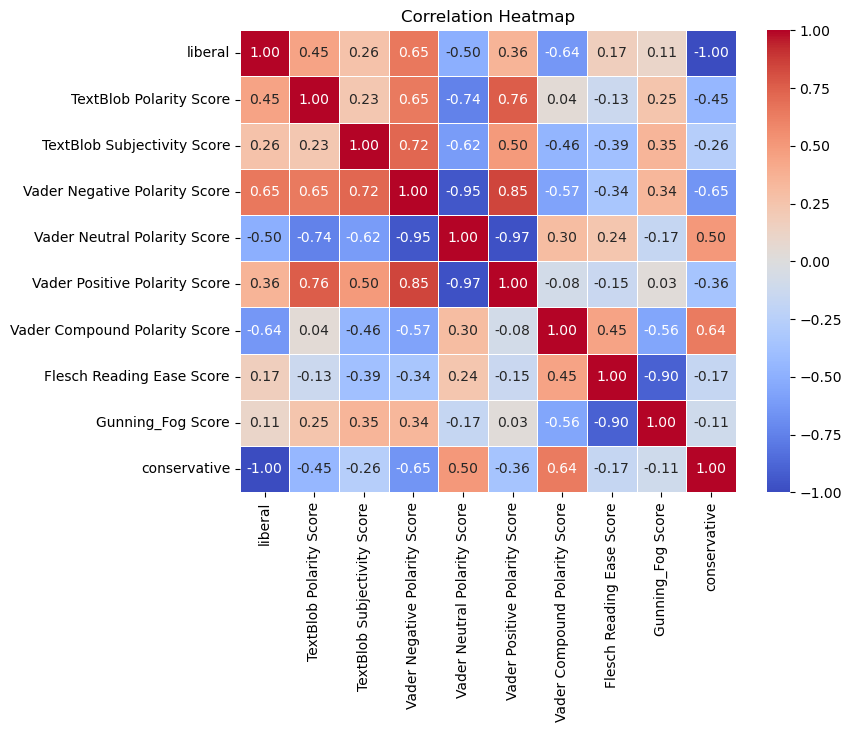

In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pandas.read_csv('Sentiments.csv')
df['conservative'] = [0 if value == 1 else 1 for value in df['liberal']]
df

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [195]:
df.describe()

,liberal,TextBlob Polarity Score,TextBlob Subjectivity Score,Vader Negative Polarity Score,Vader Neutral Polarity Score,Vader Positive Polarity Score,Vader Compound Polarity Score,Flesch Reading Ease Score,Gunning_Fog Score,conservative
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000
mean,0.500000,0.049594,0.409197,0.102333,0.813500,0.084167,-0.806133,58.01500,11.286667,0.500000
std,0.547723,0.060040,0.061591,0.026800,0.060547,0.036152,0.211984,10.48004,2.196185,0.547723
min,0.000000,-0.057591,0.346879,0.064000,0.744000,0.047000,-0.974600,42.82000,7.930000,0.000000
25%,0.000000,0.032068,0.370829,0.087000,0.760250,0.052250,-0.946600,53.51500,10.162500,0.000000
50%,0.500000,0.065114,0.398388,0.101500,0.821000,0.083500,-0.892700,57.80500,11.480000,0.500000
75%,1.000000,0.089270,0.421598,0.122750,0.863750,0.111000,-0.739275,62.07250,12.782500,1.000000
max,1.000000,0.106552,0.520548,0.135000,0.877000,0.129000,-0.424100,74.08000,13.890000,1.000000


In [216]:
df

,news,liberal,title,text,TextBlob Polarity Score,TextBlob Subjectivity Score,Vader Negative Polarity Score,Vader Neutral Polarity Score,Vader Positive Polarity Score,Vader Compound Polarity Score,Flesch Reading Ease Score,Gunning_Fog Score,conservative
0,al-jazeera,1,"For Harris and Trump, runaway US debt is the e...","Once upon a time, the United States' balloonin...",0.051824,0.365844,0.093,0.860,0.047,-0.9746,56.89,13.19,0
1,daily signal,0,"In 3 Charts, the Biden-Harris AdminÂ’s Legacy ...",President Joe Biden will leave office on Jan. ...,-0.057591,0.410992,0.085,0.865,0.050,-0.9256,52.39,11.40,1
2,fox,0,Harris stumbles on the border when pressed on ...,Vice President Kamala Harris stumbled through ...,0.025483,0.346879,0.064,0.877,0.059,-0.4241,74.08,7.93,1
3,msnbc,1,Trump tries to pretend he didn't kill a bipart...,"In late 2018, as Donald Trump prepared to laun...",0.092892,0.385784,0.127,0.744,0.129,-0.8598,63.19,9.75,0
4,townhall,0,Harris' Rhetorical Shift on Guns Reflects Wide...,In her campaign to become the next president o...,0.106552,0.425133,0.110,0.782,0.108,-0.6991,42.82,13.89,1
5,vox,1,Kamala Harris owns a gun,"""Vice President Kamala Harris had a quick come...",0.078404,0.520548,0.135,0.753,0.112,-0.9536,58.72,11.56,0


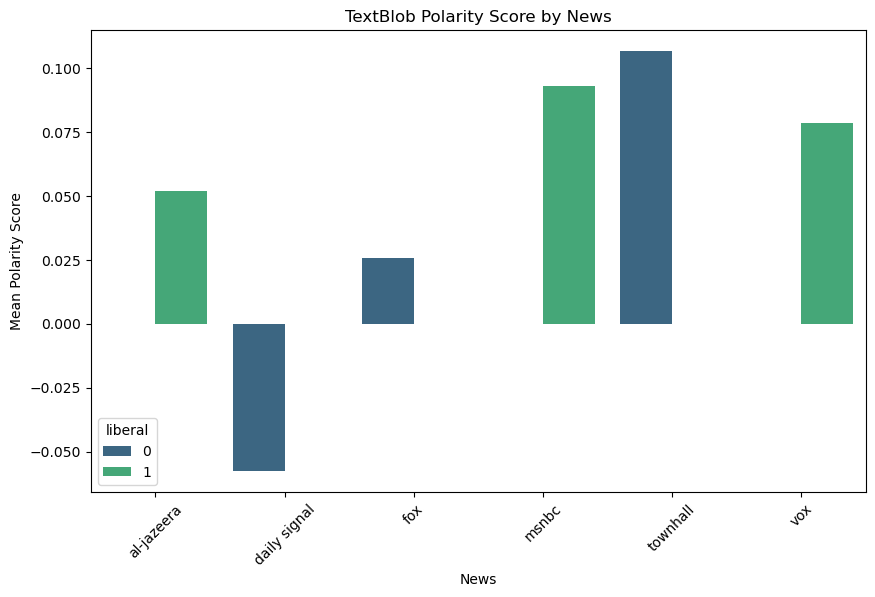

In [215]:
score ='TextBlob Polarity Score'

# Group by 'news' and calculate the mean polarity score
mean_scores = df.groupby('news')[score].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='news', y=score, hue=df['liberal'],data=mean_scores, palette='viridis')
plt.title(f'{score} by News')
plt.xlabel('News')
plt.ylabel('Mean Polarity Score')
plt.xticks(rotation=45)
plt.show()

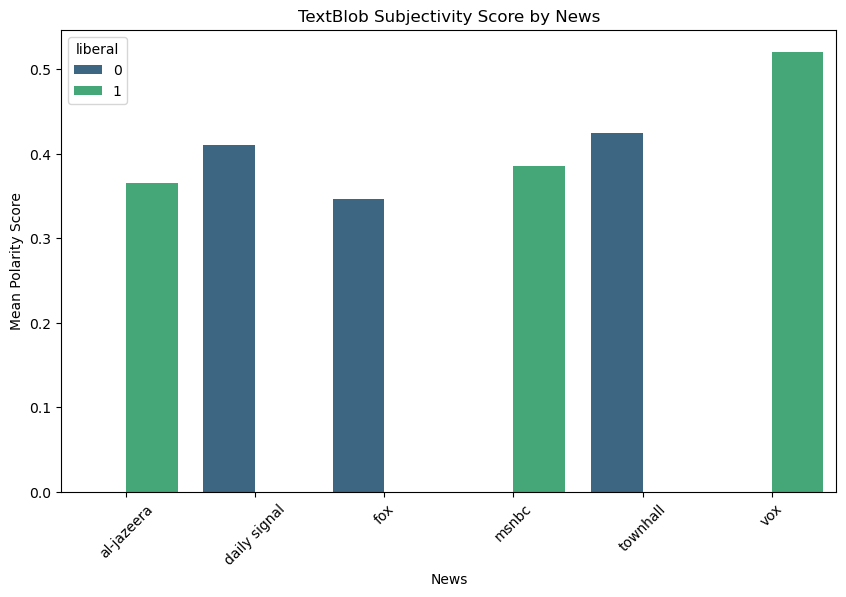

In [203]:
score ='TextBlob Subjectivity Score'

# Group by 'news' and calculate the mean polarity score
mean_scores = df.groupby('news')[score].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='news', y=score, hue=df['liberal'],data=mean_scores, palette='viridis')
plt.title(f'{score} by News')
plt.xlabel('News')
plt.ylabel('Mean Polarity Score')
plt.xticks(rotation=45)
plt.show()

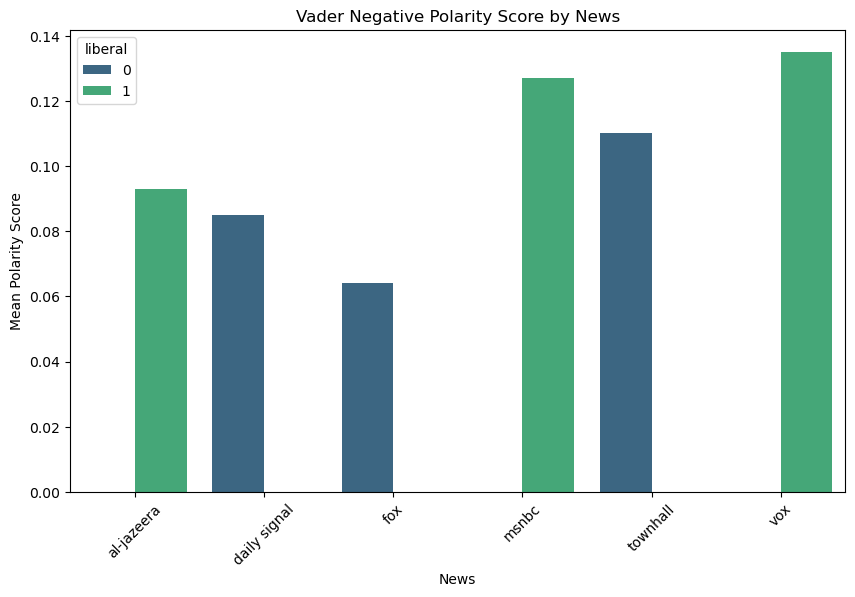

In [205]:
score ='Vader Negative Polarity Score'

# Group by 'news' and calculate the mean polarity score
mean_scores = df.groupby('news')[score].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='news', y=score, hue=df['liberal'],data=mean_scores, palette='viridis')
plt.title(f'{score} by News')
plt.xlabel('News')
plt.ylabel('Mean Polarity Score')
plt.xticks(rotation=45)
plt.show()

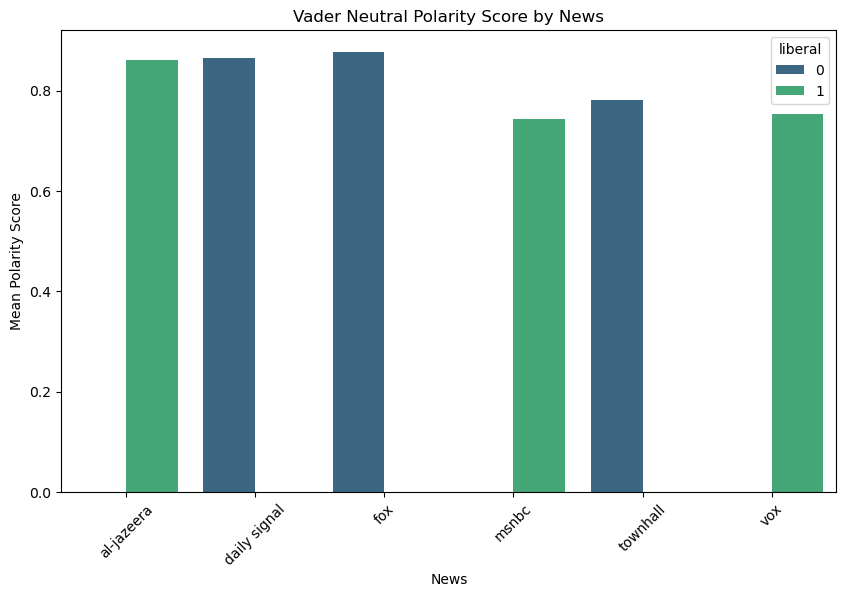

In [206]:
score = 'Vader Neutral Polarity Score'

# Group by 'news' and calculate the mean polarity score
mean_scores = df.groupby('news')[score].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='news', y=score, hue=df['liberal'],data=mean_scores, palette='viridis')
plt.title(f'{score} by News')
plt.xlabel('News')
plt.ylabel('Mean Polarity Score')
plt.xticks(rotation=45)
plt.show()

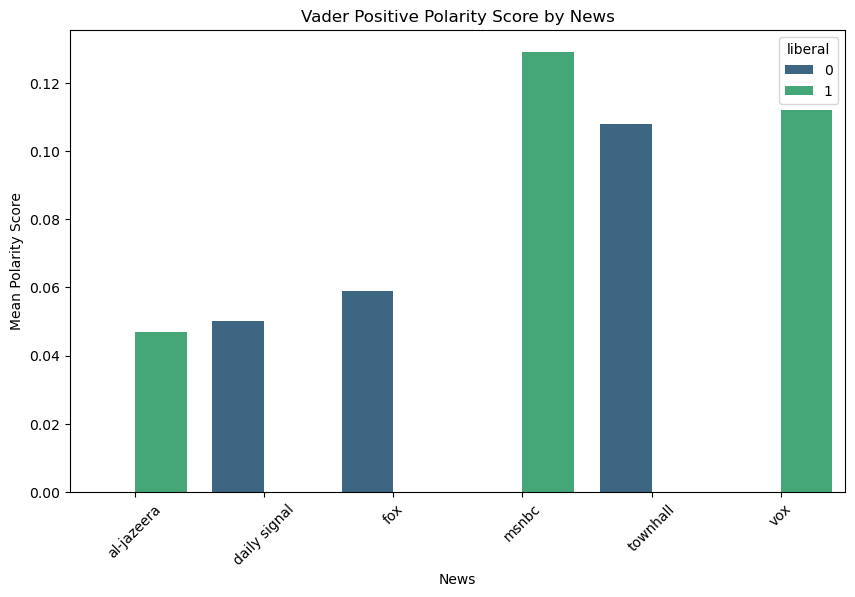

In [207]:
score =  'Vader Positive Polarity Score'

# Group by 'news' and calculate the mean polarity score
mean_scores = df.groupby('news')[score].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='news', y=score, hue=df['liberal'],data=mean_scores, palette='viridis')
plt.title(f'{score} by News')
plt.xlabel('News')
plt.ylabel('Mean Polarity Score')
plt.xticks(rotation=45)
plt.show()

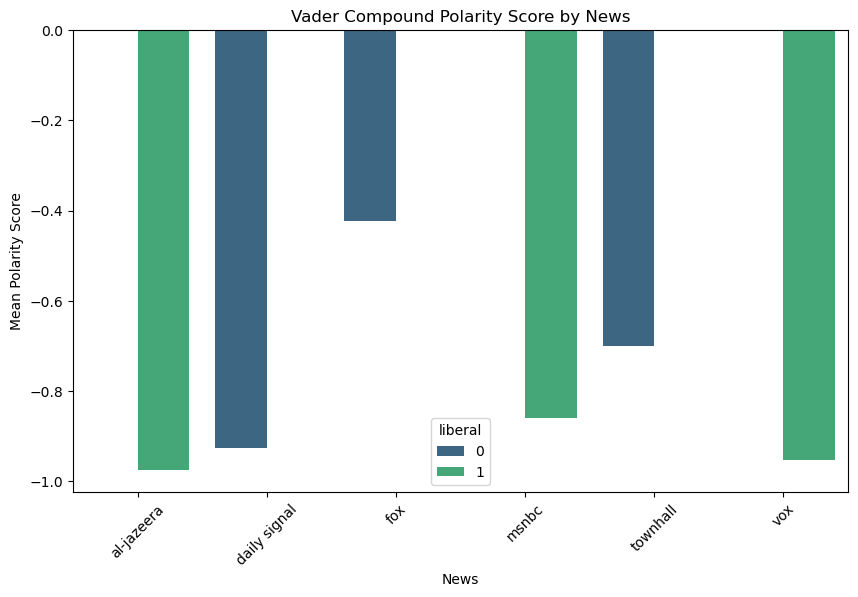

In [209]:
score =  'Vader Compound Polarity Score'

# Group by 'news' and calculate the mean polarity score
mean_scores = df.groupby('news')[score].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='news', y=score, hue=df['liberal'],data=mean_scores, palette='viridis')
plt.title(f'{score} by News')
plt.xlabel('News')
plt.ylabel('Mean Polarity Score')
plt.xticks(rotation=45)
plt.show()

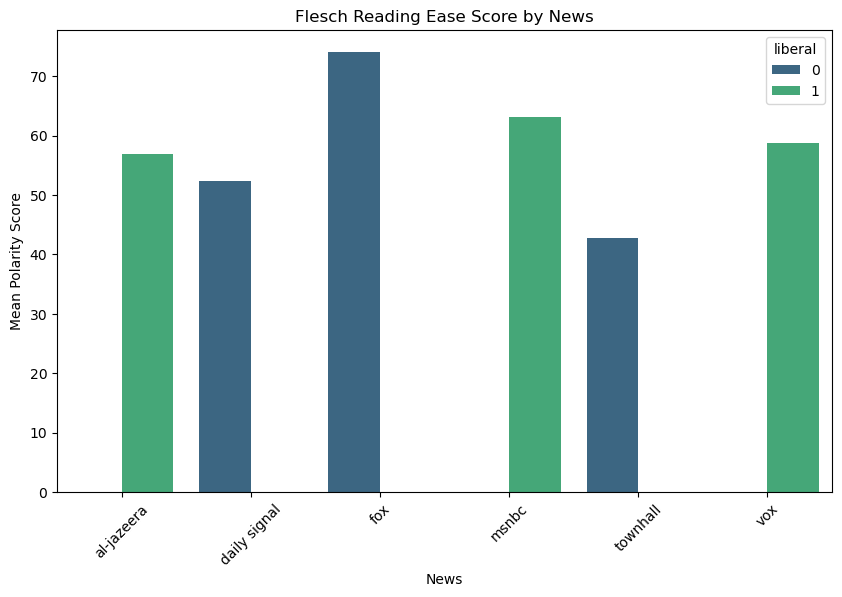

In [210]:
score = 'Flesch Reading Ease Score'

# Group by 'news' and calculate the mean polarity score
mean_scores = df.groupby('news')[score].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='news', y=score, hue=df['liberal'],data=mean_scores, palette='viridis')
plt.title(f'{score} by News')
plt.xlabel('News')
plt.ylabel('Mean Polarity Score')
plt.xticks(rotation=45)
plt.show()

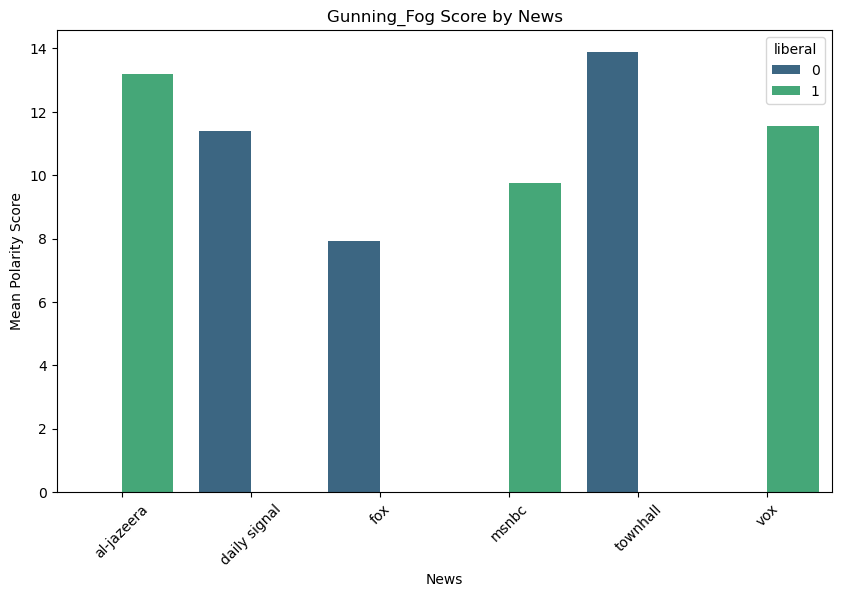

In [213]:
score = 'Gunning_Fog Score'

# Group by 'news' and calculate the mean polarity score
mean_scores = df.groupby('news')[score].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='news', y=score, hue=df['liberal'],data=mean_scores, palette='viridis')
plt.title(f'{score} by News')
plt.xlabel('News')
plt.ylabel('Mean Polarity Score')
plt.xticks(rotation=45)
plt.show()